#### Dans notre jeu de données chaque individu présente les variables suivantes:

- <span style="color: purple;">Age</span>: Age of the gym member. 
- <span style="color: purple;">Gender</span>: Gender of the gym member (Male or Female).
- <span style="color: purple;">Weight (kg)</span>: Member’s weight in kilograms.
- <span style="color: purple;">Height (m)</span>: Member’s height in meters.
- <span style="color: purple;">Max_BPM</span>: Maximum heart rate (beats per minute) during workout sessions.
- <span style="color: purple;">Avg_BPM</span>: Average heart rate during workout sessions.
- <span style="color: purple;">Resting_BPM</span>: Heart rate at rest before workout.
- <span style="color: purple;">Session_Duration (hours)</span>: Duration of each workout session in hours.
- <span style="color: purple;">Calories_Burned</span>: Total calories burned during each session.
- <span style="color: purple;">Workout_Type</span>: Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT).
- <span style="color: purple;">Fat_Percentage</span>: Body fat percentage of the member.
- <span style="color: purple;">Water_Intake (liters)</span>: Daily water intake during workouts.
- <span style="color: purple;">Workout_Frequency (days/week)</span>: Number of workout sessions per week.
- <span style="color: purple;">Experience_Level</span>: Level of experience, from beginner (1) to expert (3).
- <span style="color: purple;">BMI</span>: Body Mass Index, calculated from height and weight.


In [1]:
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
#library(FactoMineR) 
library(MASS)
library(FactoMineR)
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)
library(gplots)
library(graphics)
library(scales)
library(dplyr)
library(patchwork)

Warning message:
"le package 'ggplot2' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tidyverse' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tibble' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'tidyr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'readr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'purrr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'dplyr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'stringr' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'forcats' a été compilé avec la version R 4.4.3"
Warning message:
"le package 'lubridate' a été compilé avec la version R 4.4.3"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ 

# Préparation de la Base

## Nature des variables

In [2]:
path <- ""
Gym <- read.table(paste(path, "Donnees_projet.csv", sep = ""),
                    sep = ",", header = TRUE)

Gym[,"Gender"]<- as.factor(Gym[,"Gender"])
Gym[,"Workout_Type"]<-as.factor(Gym[,"Workout_Type"])
Gym[,"Workout_Frequency"]<-as.factor(Gym[,"Workout_Frequency..days.week."])
Gym[,"Experience_Level"]<-as.factor(Gym[,"Experience_Level"])
Gym[,"Session_Duration"]<-Gym[,"Session_Duration..hours."]
Gym[,"Water_Intake"]<-Gym[,"Water_Intake..liters."]

Gym<-Gym[, c(1:7, 9:11,14:18)]

head(Gym)
summary(Gym)

,Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Calories_Burned,Workout_Type,Fat_Percentage,Experience_Level,BMI,Workout_Frequency,Session_Duration,Water_Intake
,<int>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
1,56,Male,88.3,1.71,180,157,60,1313,Yoga,12.6,3,30.20,4,1.69,3.5
2,46,Female,74.9,1.53,179,151,66,883,HIIT,33.9,2,32.00,4,1.30,2.1
3,32,Female,68.1,1.66,167,122,54,677,Cardio,33.4,2,24.71,4,1.11,2.3
4,25,Male,53.2,1.70,190,164,56,532,Strength,28.8,1,18.41,3,0.59,2.1
5,38,Male,46.1,1.79,188,158,68,556,Strength,29.2,1,14.39,3,0.64,2.8
6,56,Female,58.0,1.68,168,156,74,1116,HIIT,15.5,3,20.55,5,1.59,2.7


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

Dans ce jeu de données on observe 11 variables quantitatives et 4 variables qualitatives. Pour traiter les données correctement nous avons transformés les données qualitatives en facteur et nous avons renommé les colonnes dont le nom était trop long ou pas assez intuitif. 

## Analyse unidimensionnelle des variables

Warning message:
"The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


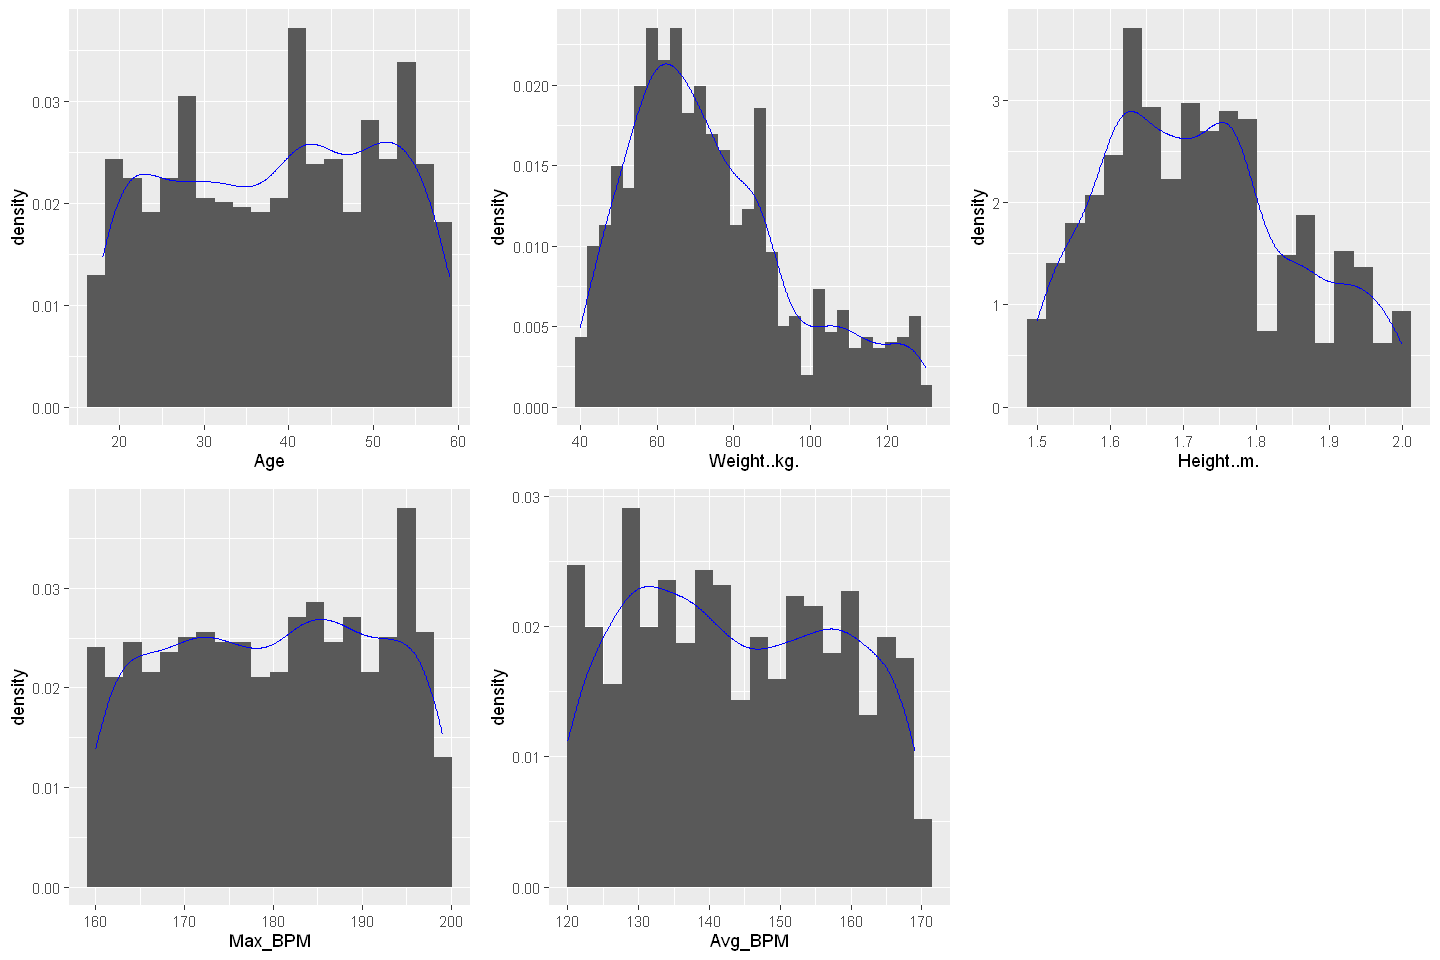

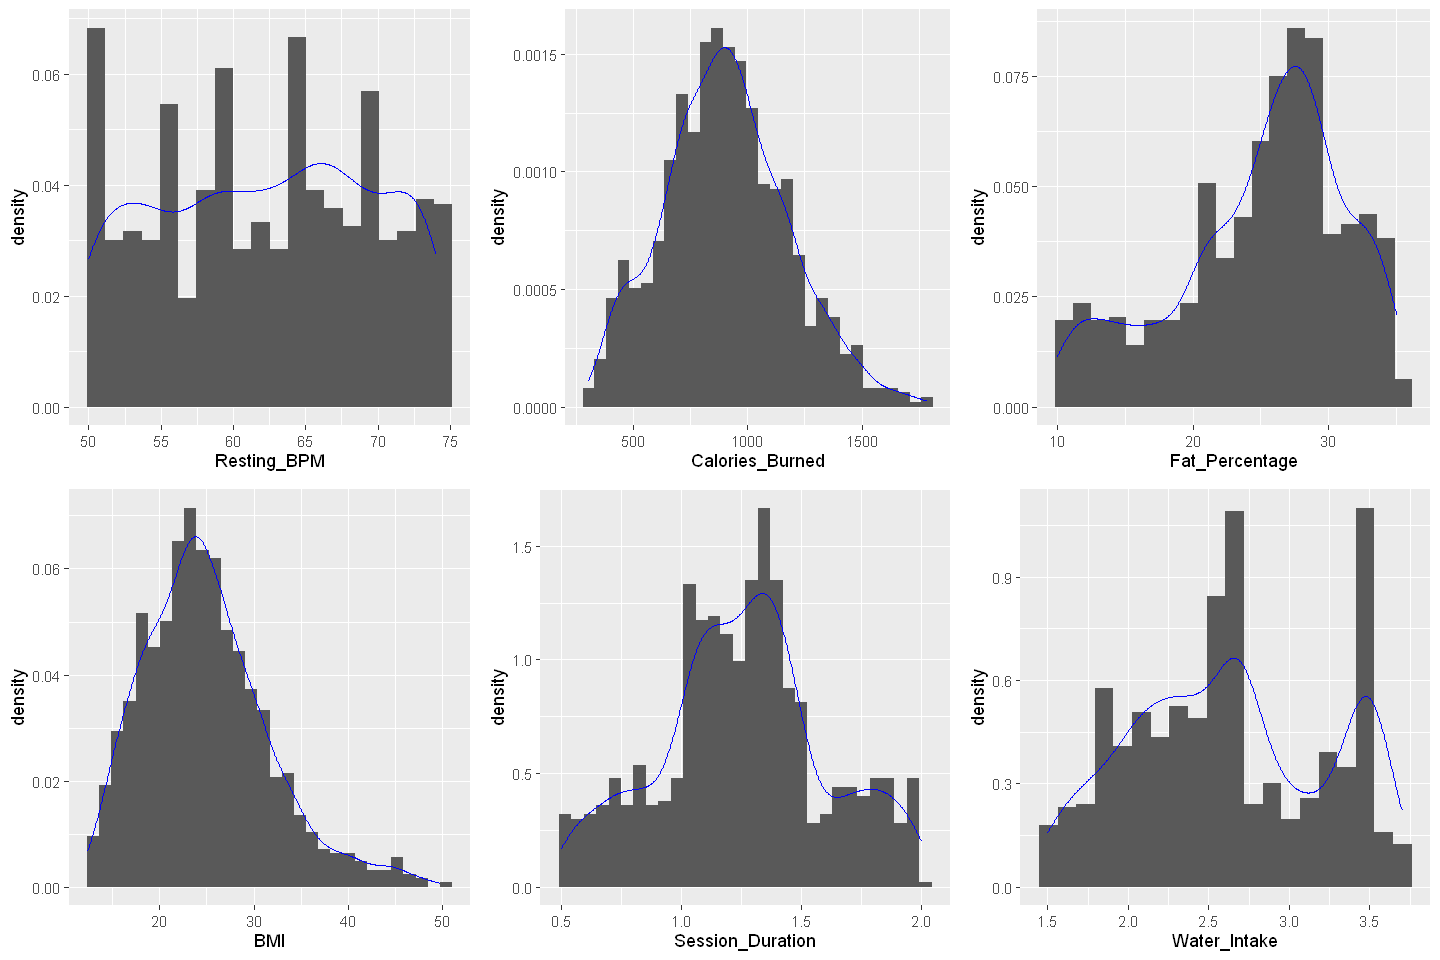

In [3]:
g1<-ggplot(Gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g2<-ggplot(Gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g3<-ggplot(Gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(Gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(Gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(Gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue") 
g7<-ggplot(Gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(Gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")
g9<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g10<-ggplot(Gym,aes(x=Session_Duration))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g11<-ggplot(Gym,aes(x=Water_Intake))+geom_histogram(aes(y=..density..),bins=20)+geom_density(alpha=.2, col="blue")

options(repr.plot.width = 12, repr.plot.height = 8)
grid.arrange(g1,g2,g3,g4,g5,ncol=3)
grid.arrange(g6,g7,g8,g9,g10,g11,ncol=3)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11)

liste des transformations possibles pour le pré-processing des données: \
Transformation logarithmique (si les données sont fortement asymétriques).

Transformation racine carrée (si les données ne sont pas aussi étendues).

Transformation Box-Cox (pour rechercher automatiquement la meilleure transformation).

Transformation de puissance inverse (si tu veux réduire l'impact des grandes valeurs).

Transformation quantile

Je vois pas de transformation très utile ici.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


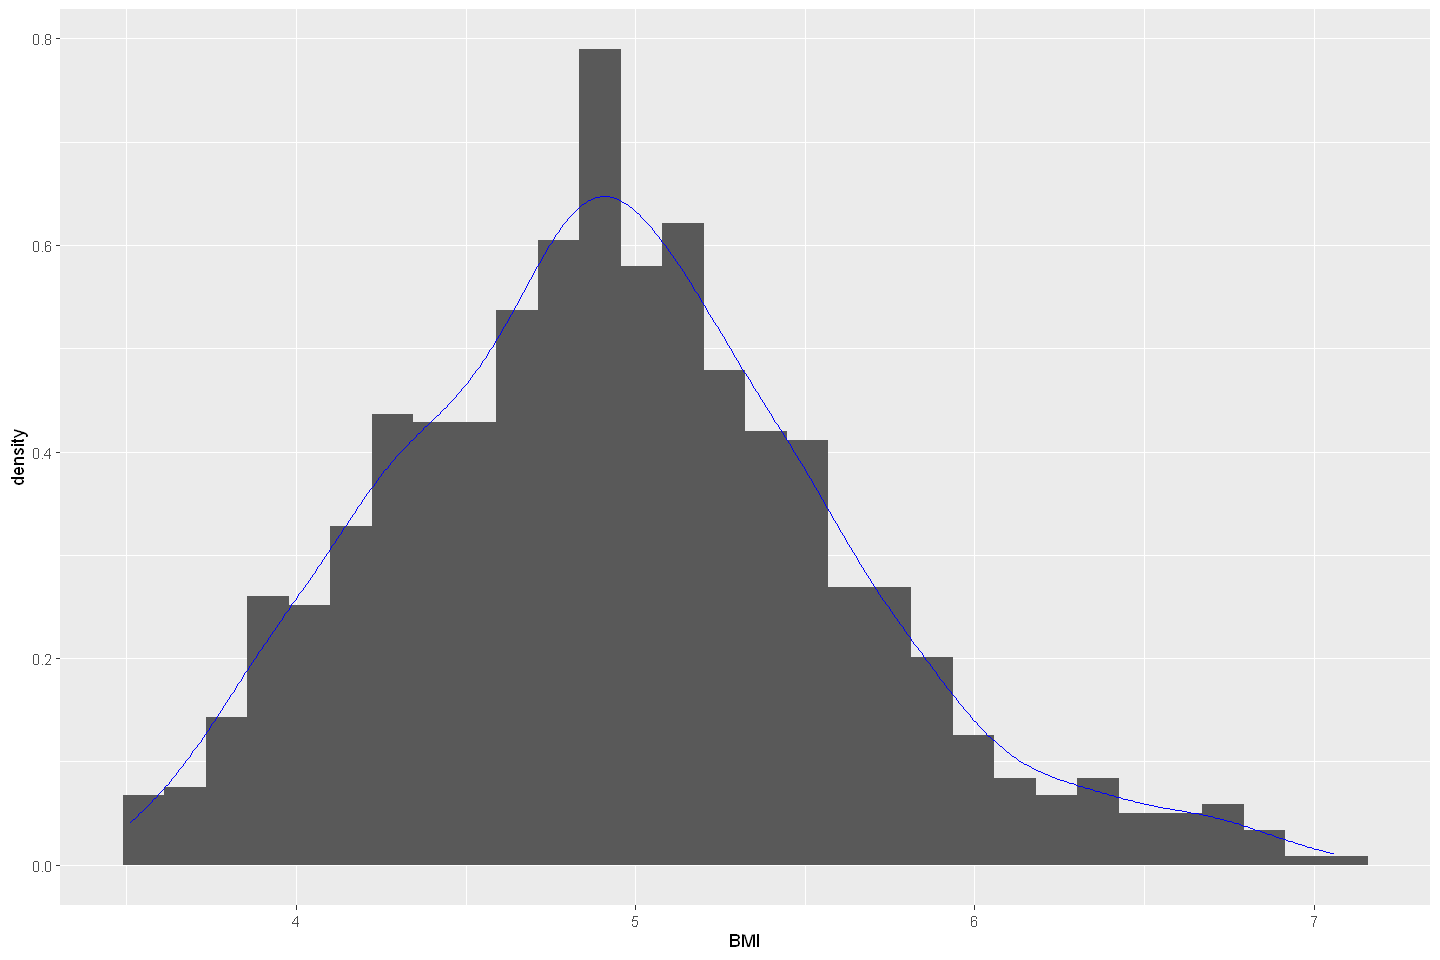

In [4]:
Gym[,"BMI"]<-sqrt(Gym[,"BMI"])

g9b<-ggplot(Gym,aes(x=BMI))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")

grid.arrange(g9b,ncol=1)

En essayant des transformations des variables quantitatives on se rend compte qu'elles ne sont pas forcément pertinentes. Il faudrait se renseigner sur d'autres transformations pour des variables plus complexes et distribuées moins uniformément 

Pour mieux comprendre la composition de ce jeu de données nous allons représenter la distribution de toutes les modalités des variables qualitatives afin de mieux cerner de quels types d'individus est composée la base de données. 

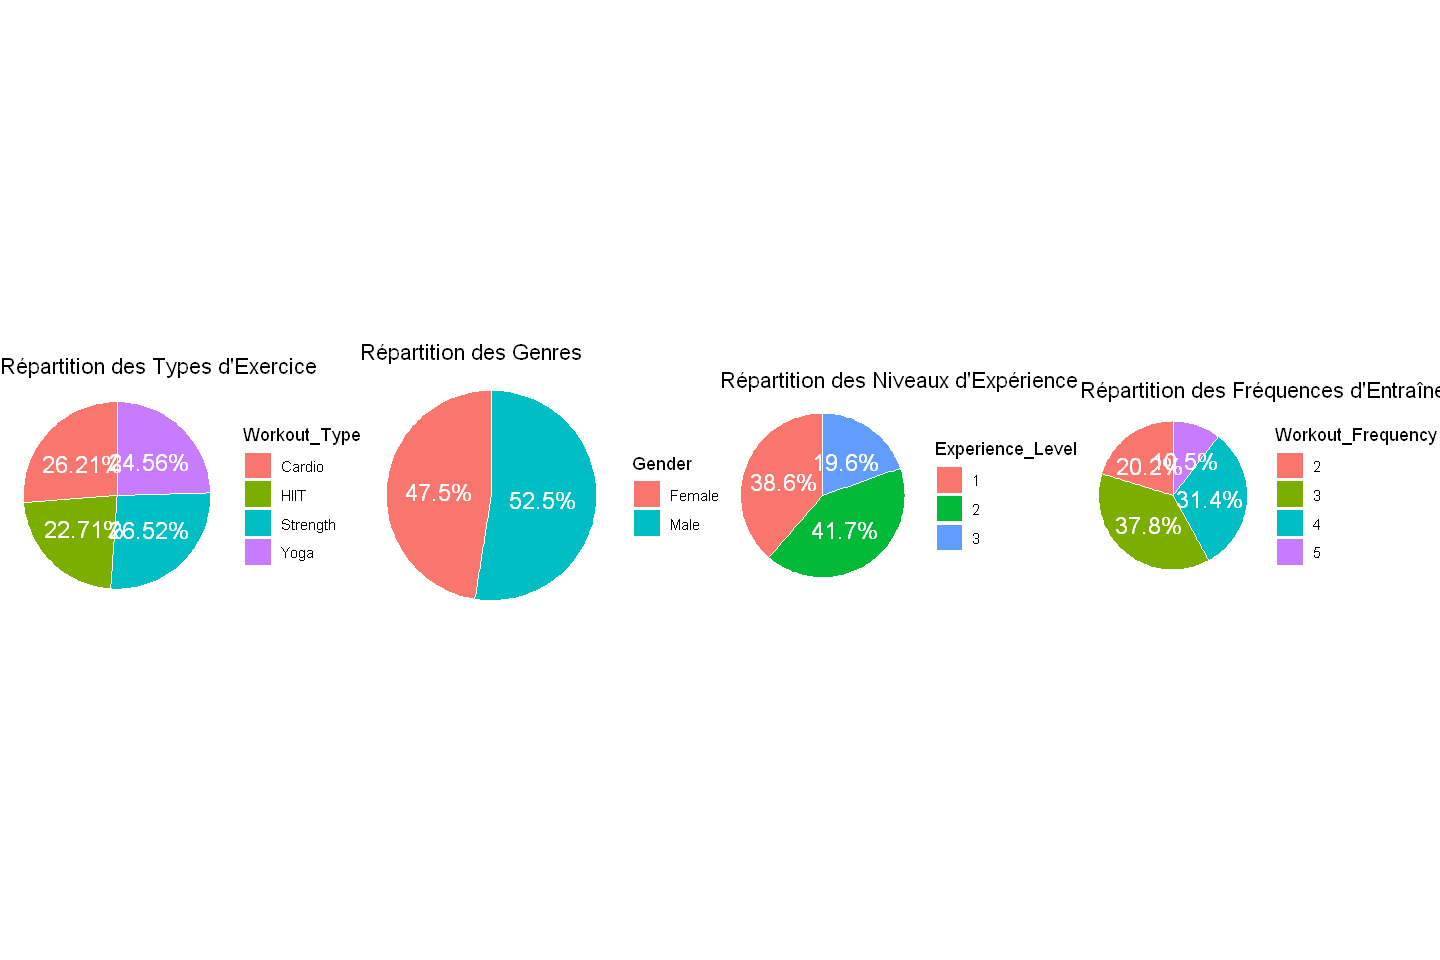

In [5]:
g1 <- ggplot(Gym, aes(x = "", fill = Workout_Type)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Types d'Exercice") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g2 <- ggplot(Gym, aes(x = "", fill = Gender)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Genres") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g3 <- ggplot(Gym, aes(x = "", fill = Experience_Level)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Niveaux d'Expérience") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

g4 <- ggplot(Gym, aes(x = "", fill = Workout_Frequency)) + geom_bar( width = 1, color="white") + coord_polar(theta = "y") +
  labs(title = "Répartition des Fréquences d'Entraînement") + geom_text(stat= "count", aes(label= percent(..count../sum(..count..))), position = position_stack(vjust = 0.5), color="white", size =5) + 
  theme_void()

grid.arrange(g1,g2,g3,g4,ncol=4)

On remarque donc que les types d'entraînement et le genre sont des variables plutôt équilibrées, chaque moalités est représentées de façon assez équivalente. Pour les autres variables qualitatives on remarque que les individus plus expérimentés et dont la durée d'entrapinement est plus longue sont bien moins nombreux que les autres. 

## Analyse bidimensionnelle des variables
#### Corrélation

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 303.0   Cardio  :255  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 720.0   HIIT    :221  
 Median :143.0   Median :62.00   Median : 893.0   Strength:258  
 Mean   :143.8   Mean   :62.22   Mean   : 905.4   Yoga    :239  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1076.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1783.0          

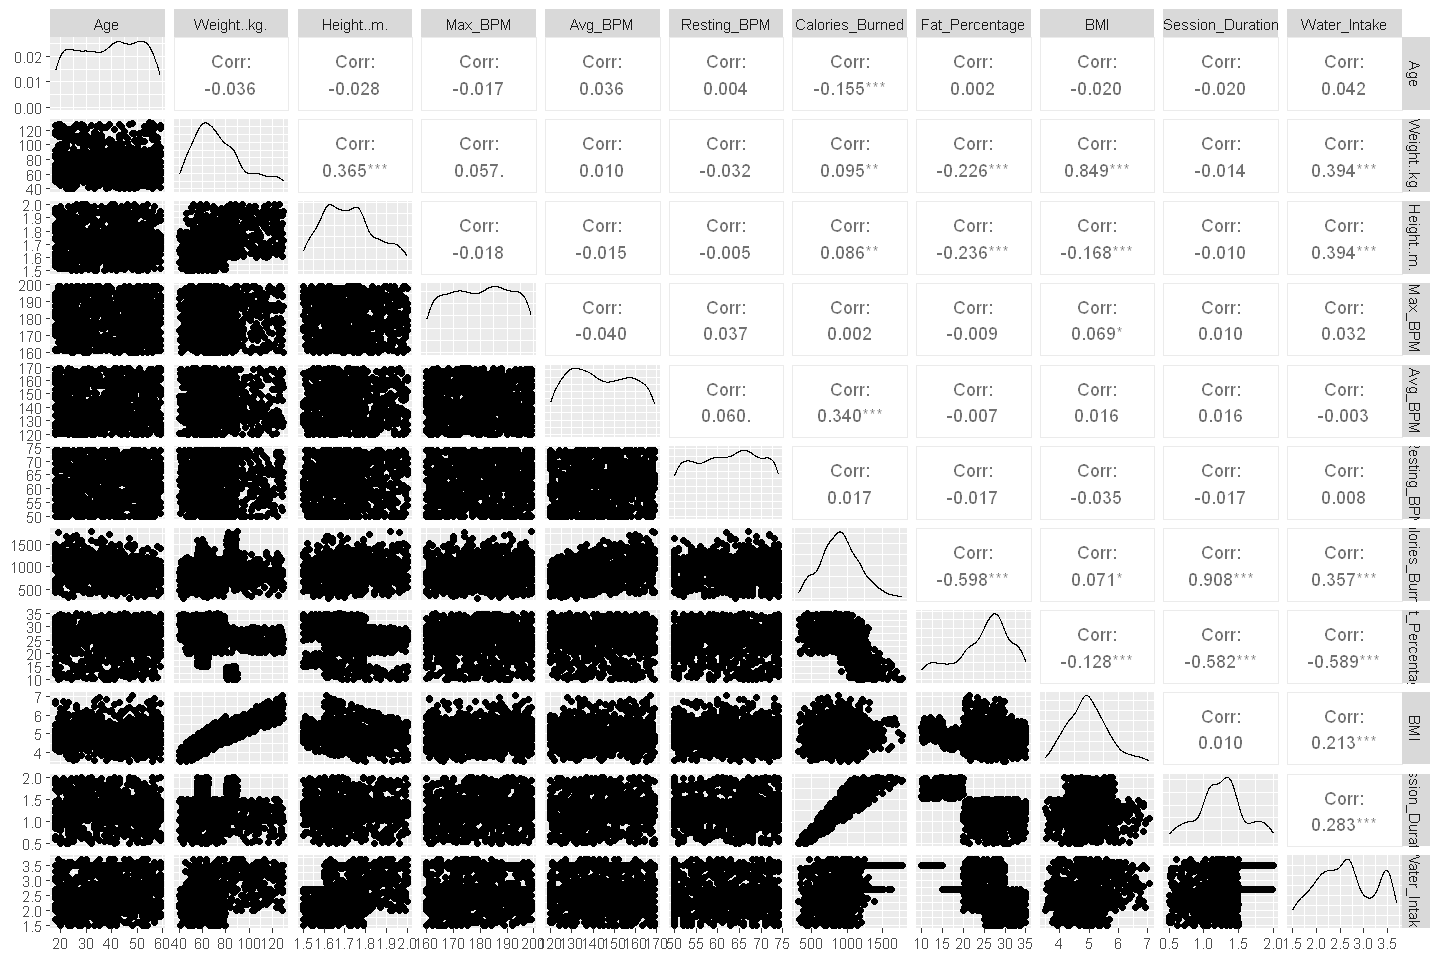

In [6]:
summary(Gym)
ggpairs(Gym[, c(1,3:8,10,12,14:15)])

On remarque facilement plusieurs corrélations linéaires très fortes, notamment entre le poids et l'IMC ( avec une corrélation de 0.852) et entre la durée de la session et les calories brulées (corrélation = 0.912) 
Ces liens s'établissent de façon évidentes par leur nature. 
D'un autre côté, on observe des comportements atypiques qui semblent établir des relations non linéaires entre les variables Durée de la séance et le pourcentage de masse graisseuse. ces deux variables semblent établir des seuils entre elles. 
Pour des variables comme Consommation d'eau on retrouve les pics observés dans les histogrammes précédents. 

A faire: Trouver la commande qui détermine l'indice des individus chelous dans fat percentage/ Water intake
Voir globalement si on peut analyser plus les pics de water intake?

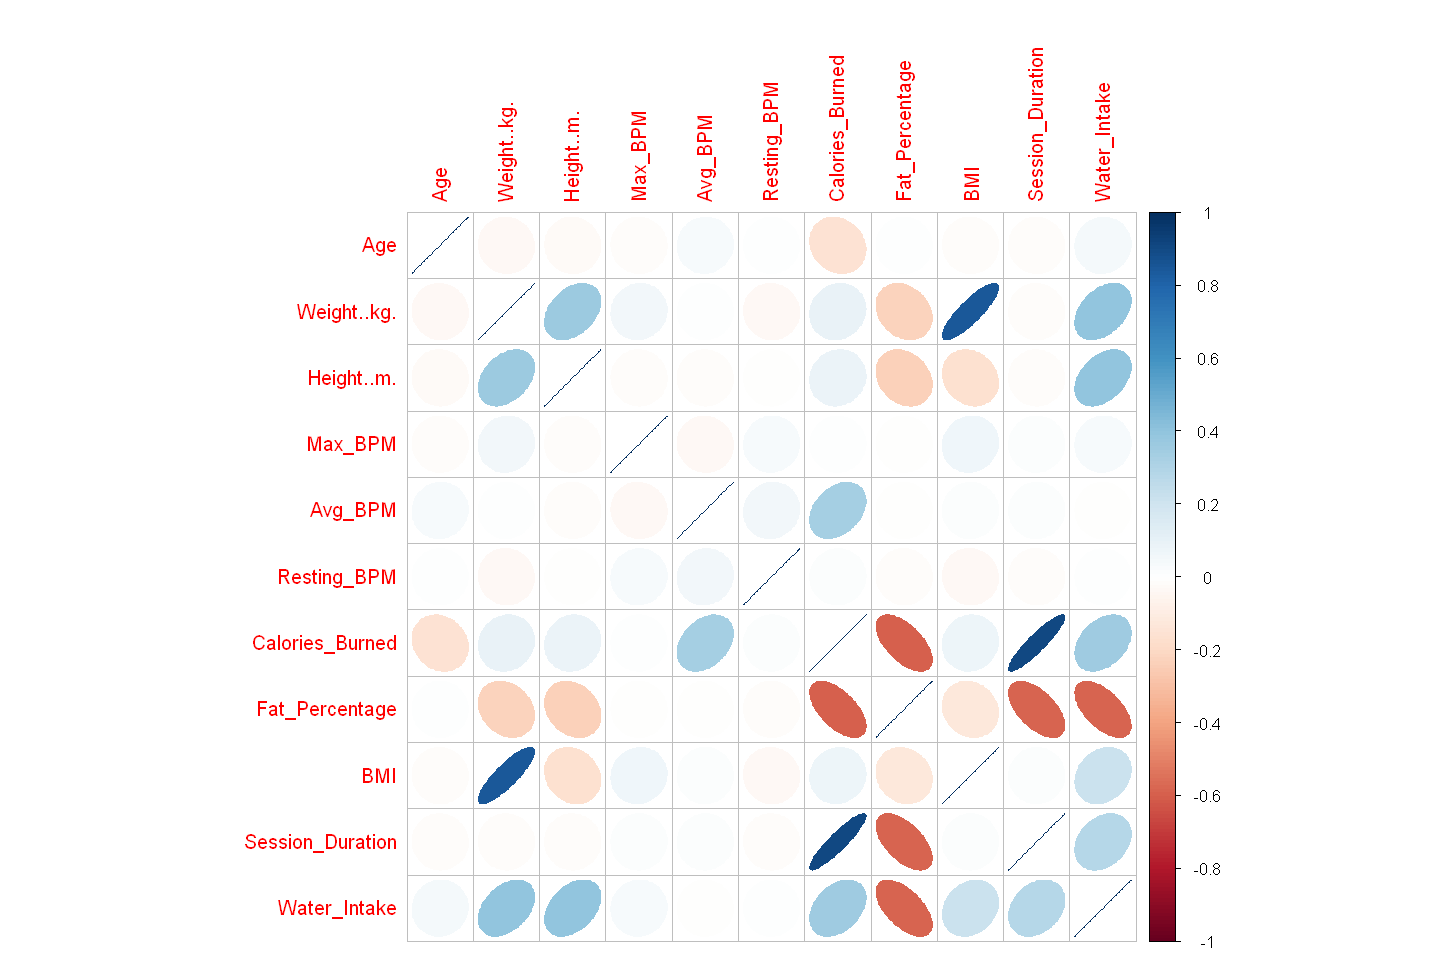

In [7]:
library(corrplot)
corrplot(cor(Gym[, c(1,3:8,10,12,14:15)]),method="ellipse")

#### Quali/Quanti

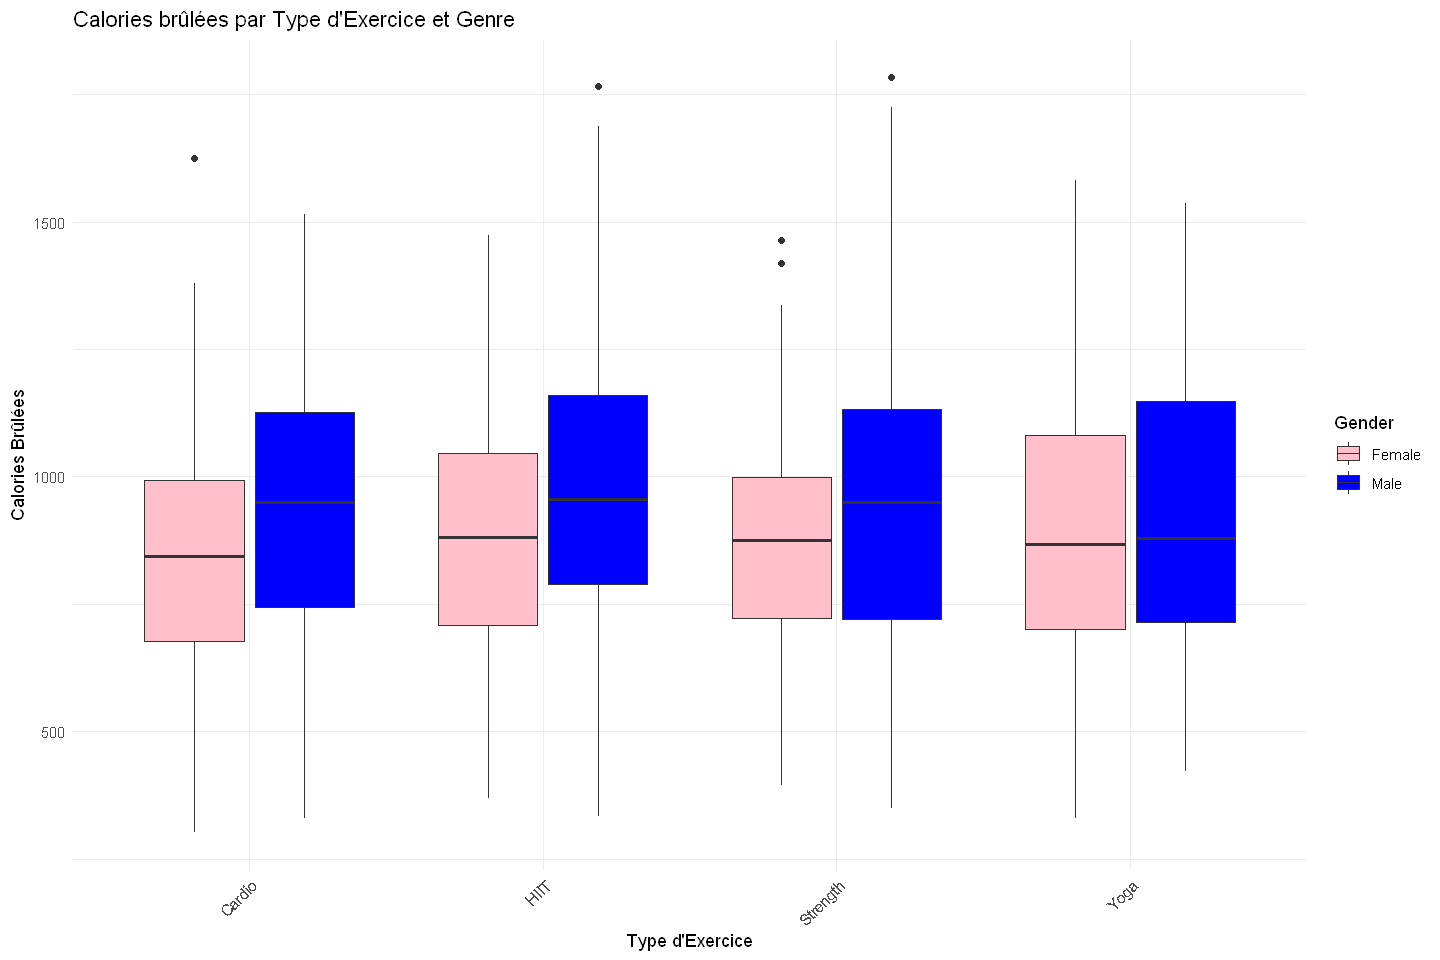

In [8]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Calories brûlées par Type d'Exercice et Genre",
       x = "Type d'Exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("Male" = "blue", "Female" = "pink")) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Pour un même type d'entraînement, on remarque que les hommes dépensent en général plus de calories que les femmes. 

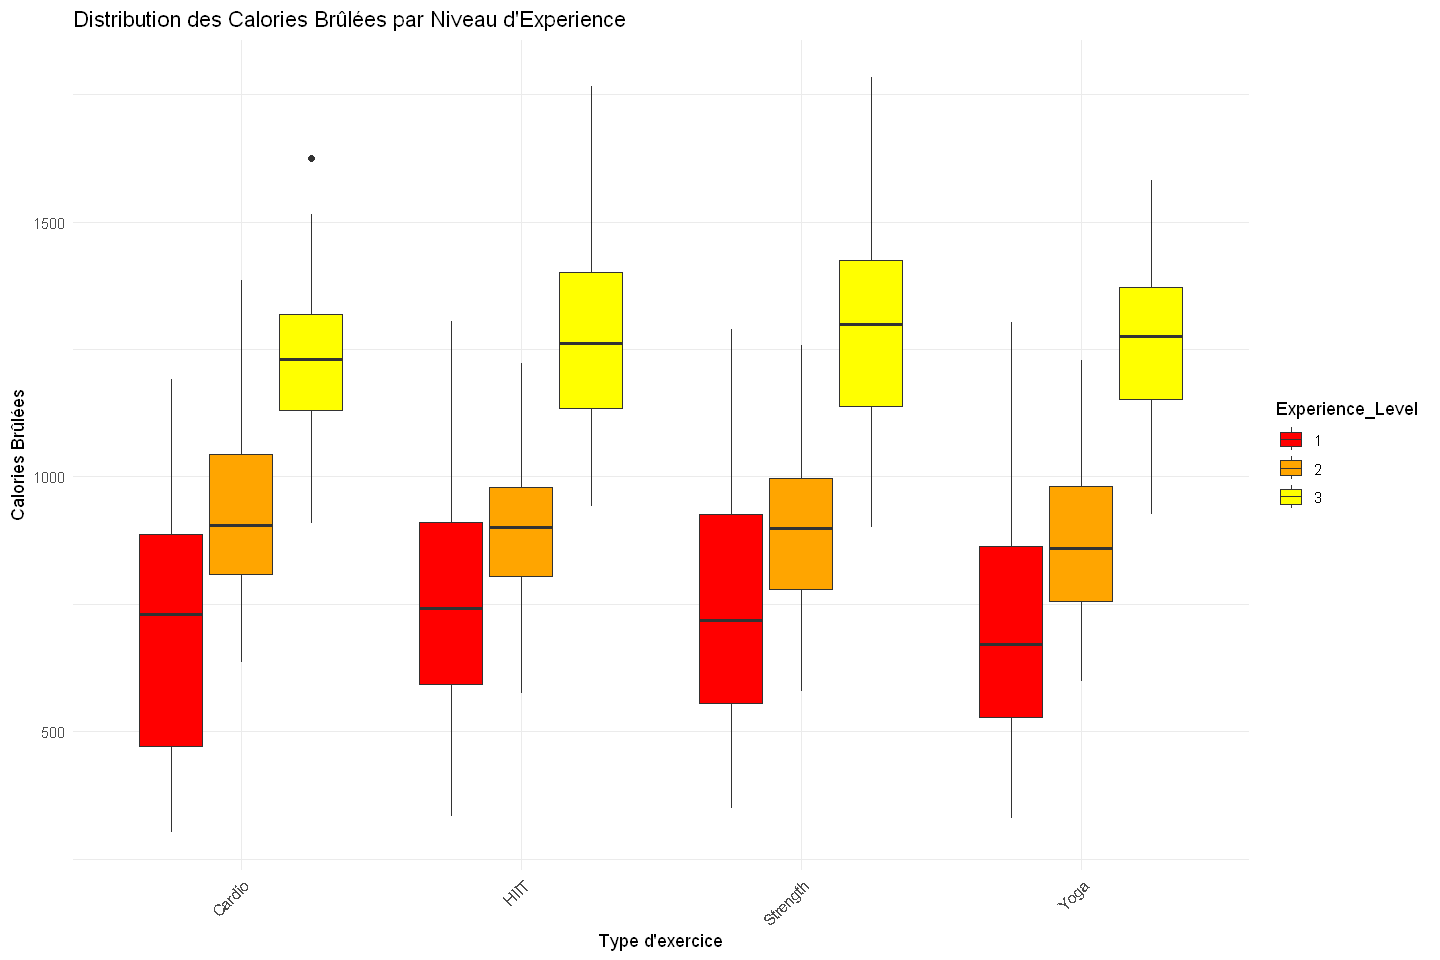

In [9]:
ggplot(Gym, aes(x = Workout_Type, y = Calories_Burned, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution des Calories Brûlées par Niveau d'Experience",
       x = "Type d'exercice",
       y = "Calories Brûlées") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))+
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

Nous voyons de façon évidente qu'à un niveau d'experience plus élevée est souvent associées un plus grand nombre de calories brulées, cela est sûrement dû à l'intensité et à la durée d'exercice qui devrait augmenter avec l'expérience nous allons à présent le vérifier. 

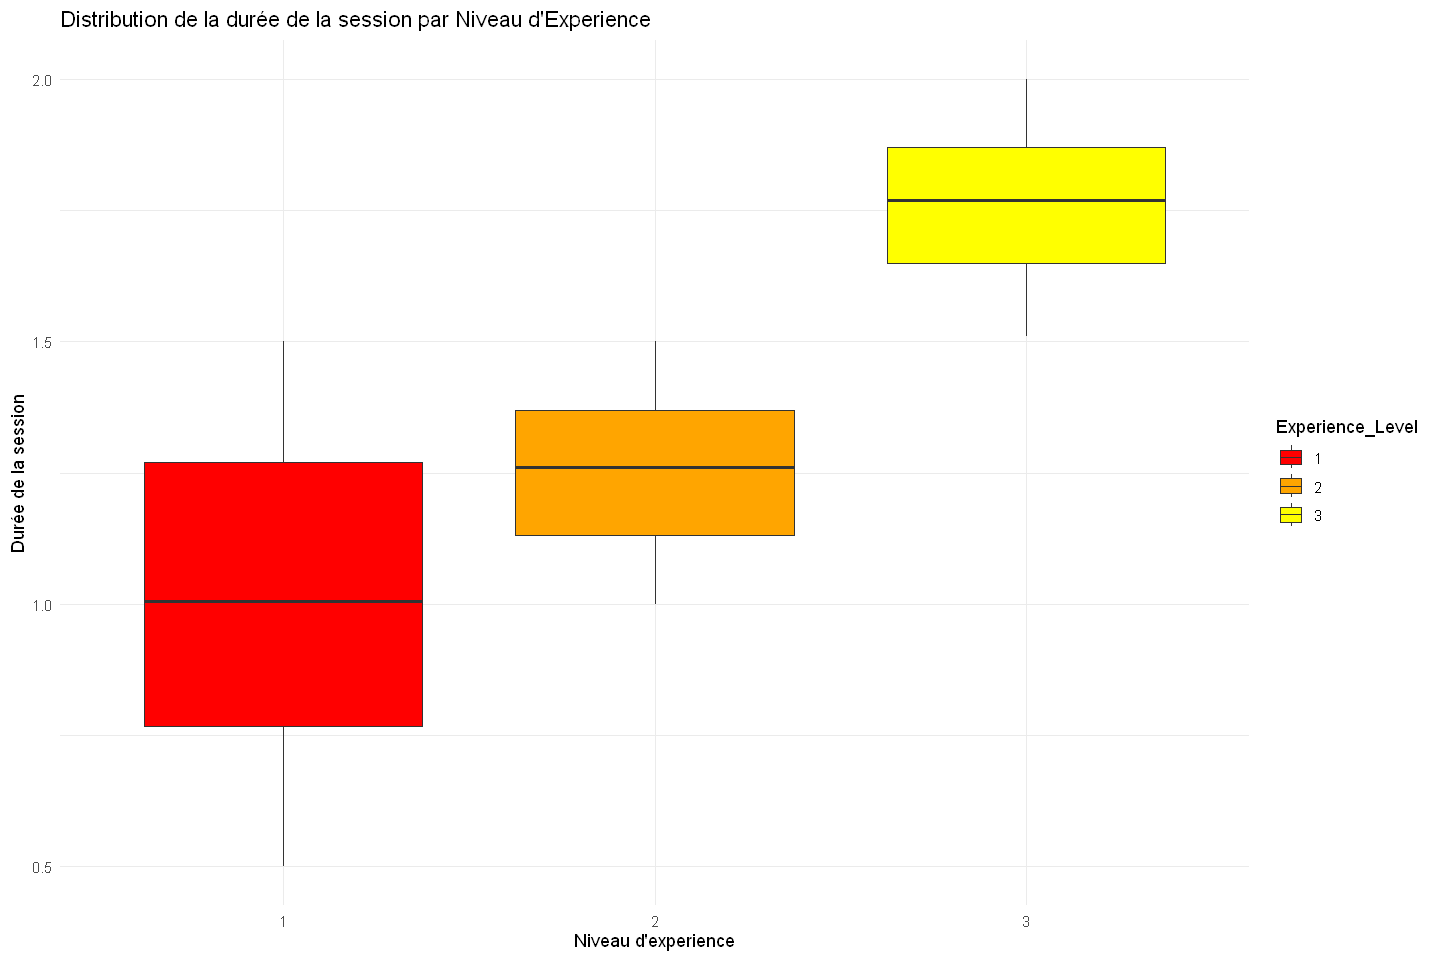

In [10]:
ggplot(Gym, aes(x = Experience_Level, y = Session_Duration, fill = Experience_Level)) +
  geom_boxplot() +
  labs(title = "Distribution de la durée de la session par Niveau d'Experience",
       x = "Niveau d'experience",
       y = "Durée de la session") +
  theme_minimal() +
  scale_fill_manual(values = c("1" = "red", "2" = "orange", "3"="yellow"))

On comprend de façon logique que les individus avec le plus d'expérience font des séances plus longues, c'est une première explication de pourquoi les plus expérimentés dépenssent plus de calories.

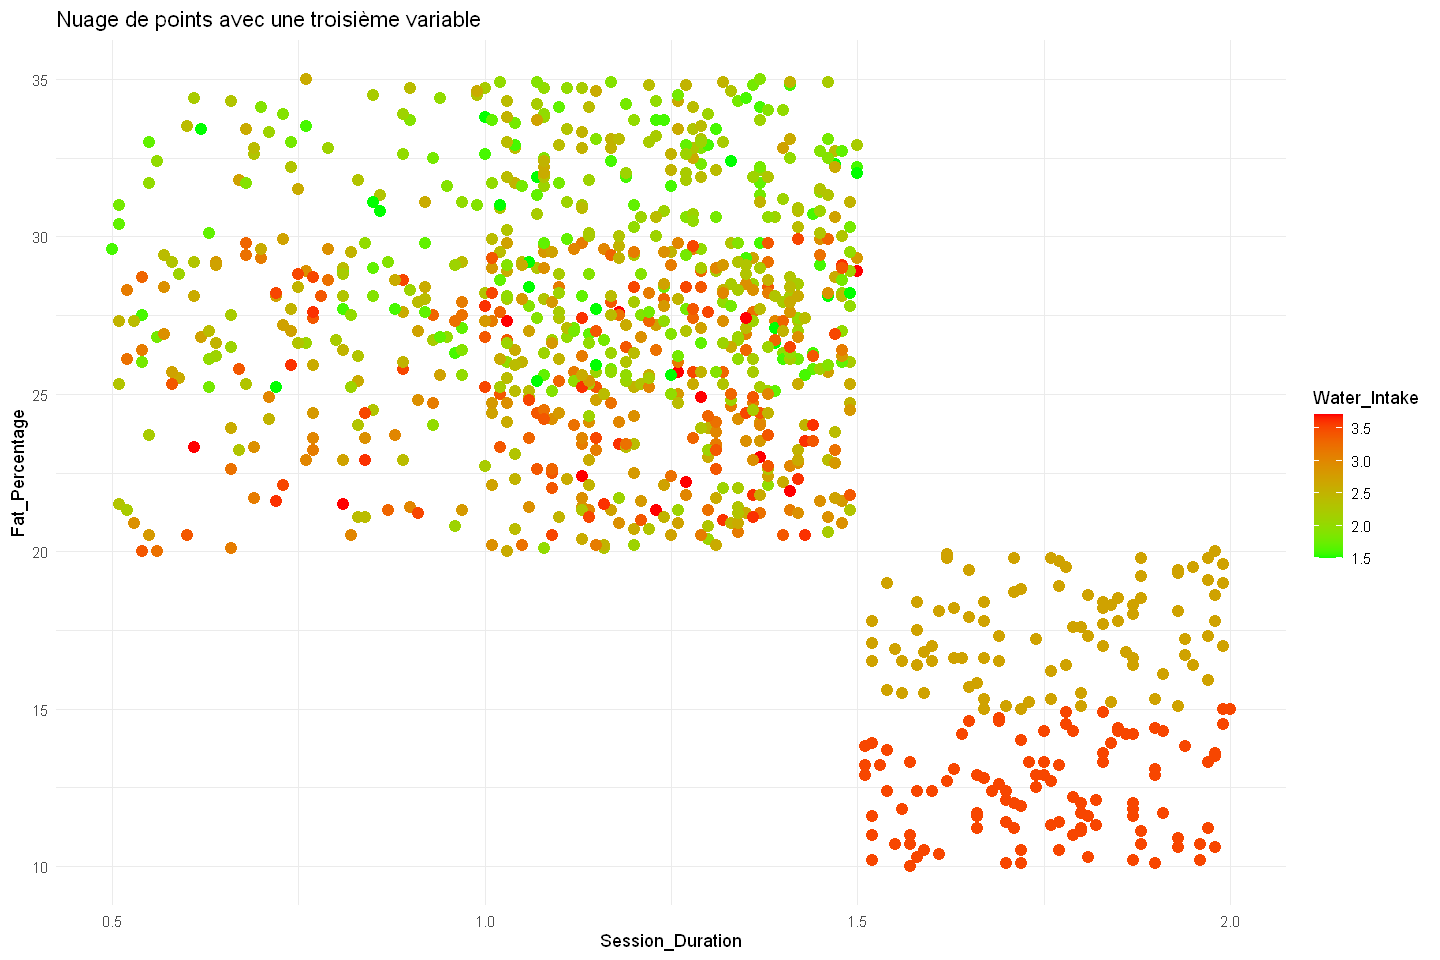

In [11]:
ggplot(Gym, aes(x=Session_Duration, y=Fat_Percentage, color=Water_Intake)) +
  geom_point(size=3) +  # Points colorés selon z
  scale_color_gradient(low="green", high="red") +  # Gradient de couleur
  labs(title="Nuage de points avec une troisième variable",
       x="Session_Duration", y="Fat_Percentage", color="Water_Intake") +
  theme_minimal()

Nous trouvons la présence d'un seuil assez étonnante mais cela peut-être lié à la manière dont les mesures ont été calculées. On a affiché les trois ensemble car elle présentent des corrélation négatives. Au vu de la répartion en seuil c'est encore une fois sûrement dû à la manières dont les données ont été collectées.

#### Quali/Quali

Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add = TRUE) %>% group_split()"


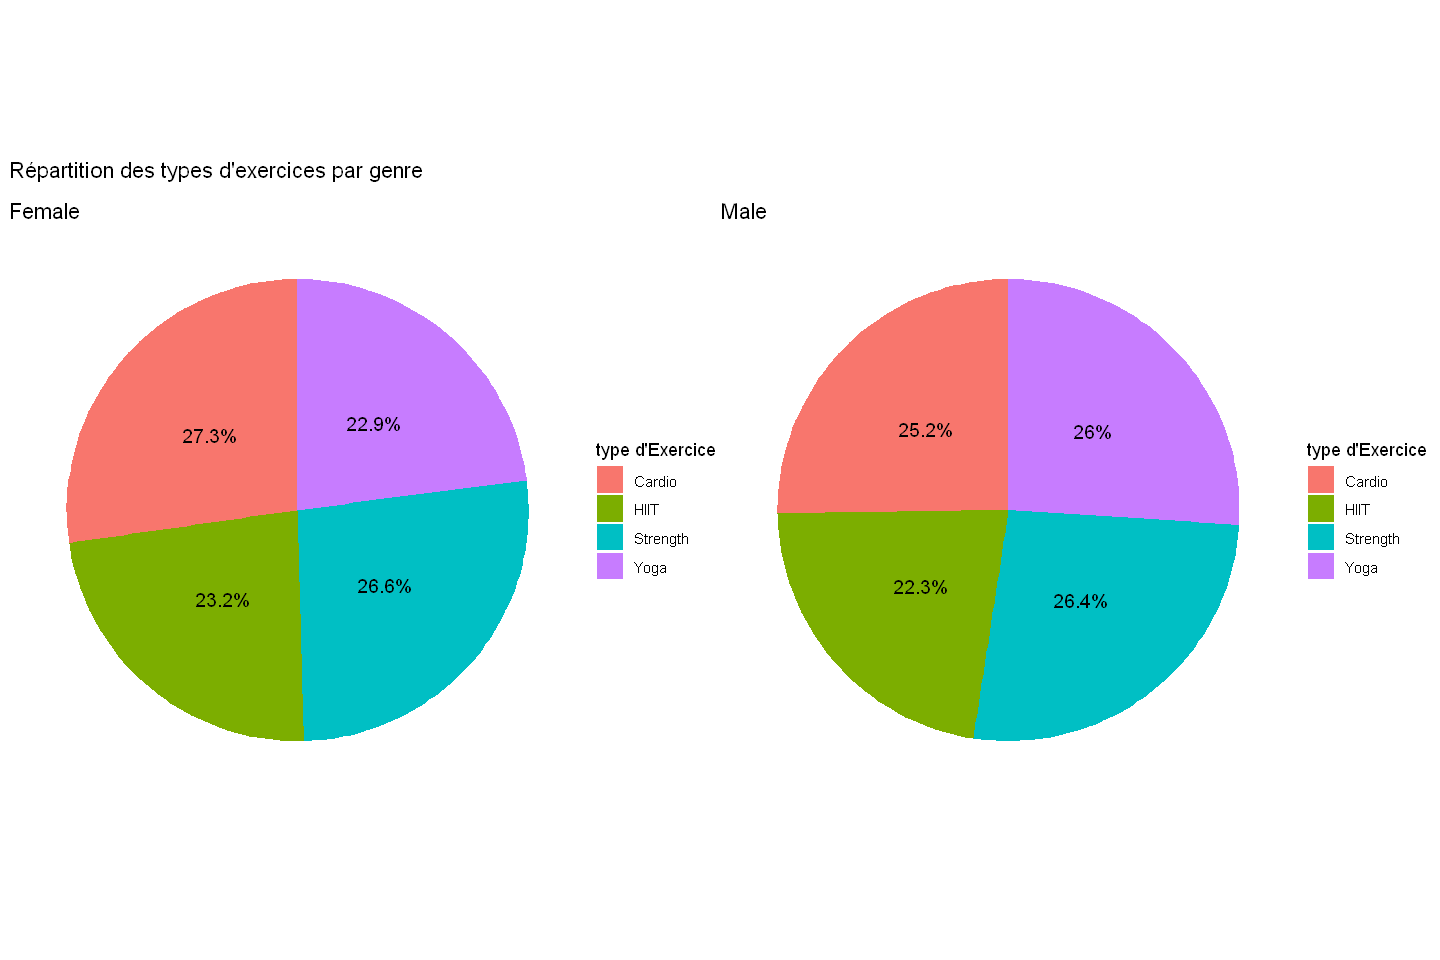

In [12]:
df_pie <- Gym %>%
  count(Gender, Workout_Type) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Workout_Type)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "type d'Exercice") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des types d'exercices par genre")

Warning message:
"... is ignored in group_split(<grouped_df>), please use group_by(..., .add = TRUE) %>% group_split()"


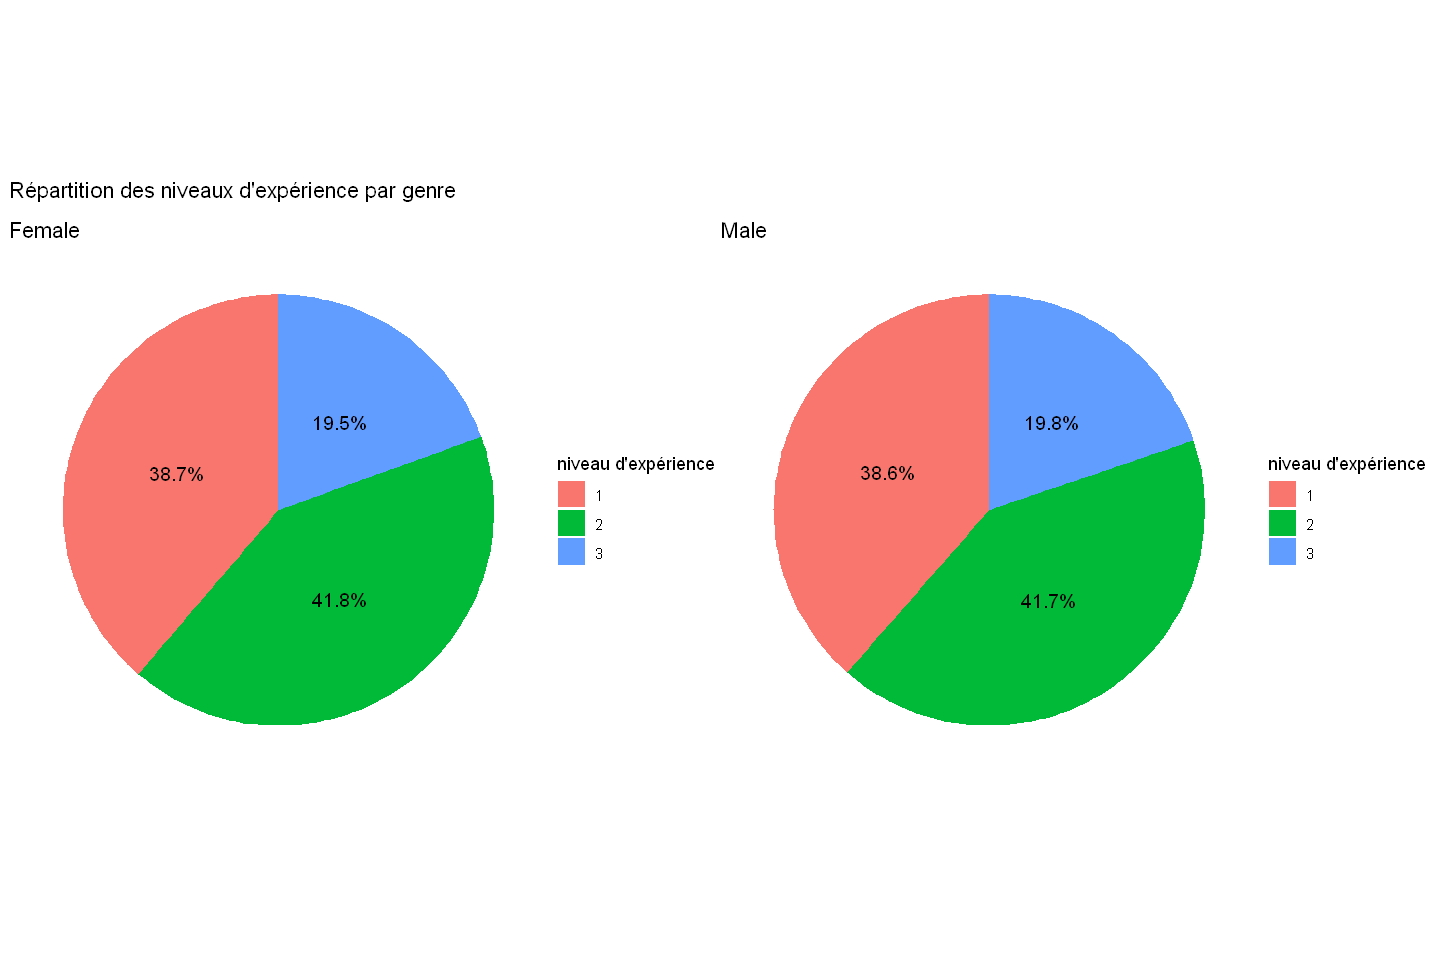

In [13]:
df_pie <- Gym %>%
  count(Gender, Experience_Level) %>%  # Compte les occurrences
  group_by(Gender, .add = TRUE) %>%
  mutate(Prop = n / sum(n), Label = paste0(round(Prop * 100, 1), "%"))

plot_pie <- function(Gym) {
  ggplot(Gym, aes(x = "", y = Prop, fill = Experience_Level)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar(theta = "y") +
    labs(title = unique(Gym$Gender), fill = "niveau d'expérience") +
    theme_void() +
    theme(legend.position = "right") +
    geom_text(aes(label = Label), position = position_stack(vjust = 0.5), size = 4)
}

plots <- df_pie %>%
  group_split(Gender) %>%
  lapply(plot_pie)

wrap_plots(plots) + plot_annotation(title = "Répartition des niveaux d'expérience par genre")

on voit que la répartition des niveaux d'expériences est similaire entre les hommes et les femmes. On ne peut donc pas expliquer la différence de calories brulées par une différence de niveau.

## Analyse en Composante Principale 

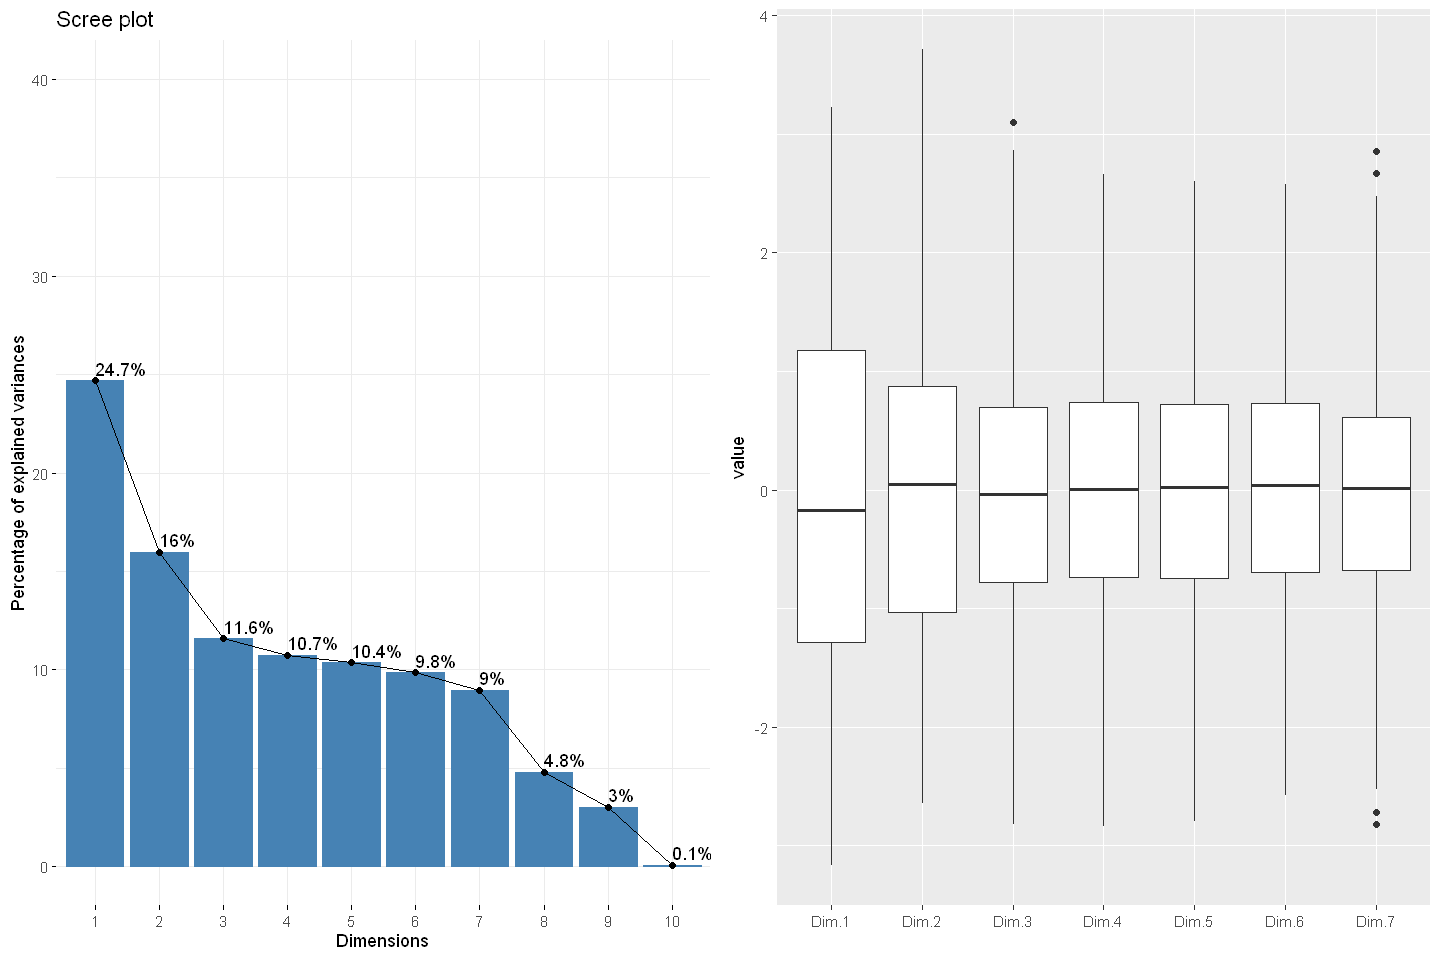

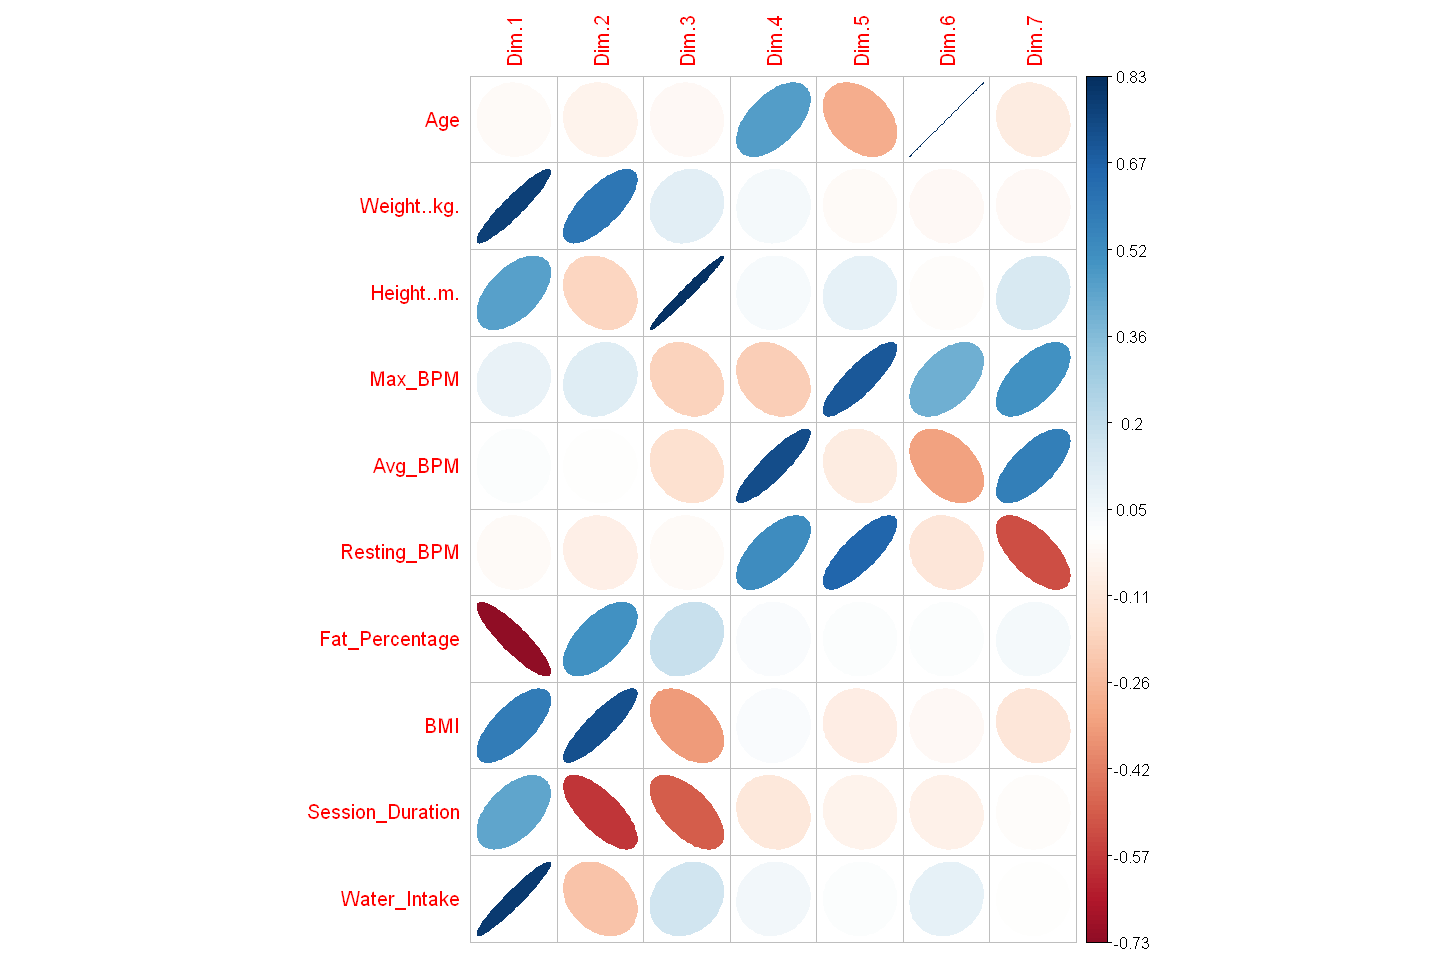

In [14]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 7)

g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

Par ces graphiques on veut évaluer la pertinence d'une Analyse en composantes principales. On voit ici que pour avoir une variance cumulée supérieure à 80% il nous faudrait 6 dimensions. Ne pouvant pas faire de représentation en 6 dimensions il va être compliqué de faire une ACP très pertinente. Pour commencer une analyse nous avons décider de présenter des graphiques sur les 3 premières dimensions mais il faut prendre en compte que les représentations ne représenteront que peu d'information. 

In [15]:
acp <- PCA(Gym[, c(1,3:8,10,12,14:15)], scale.unit = TRUE,
           graph = FALSE, quanti.sup = 7, ncp = 6)

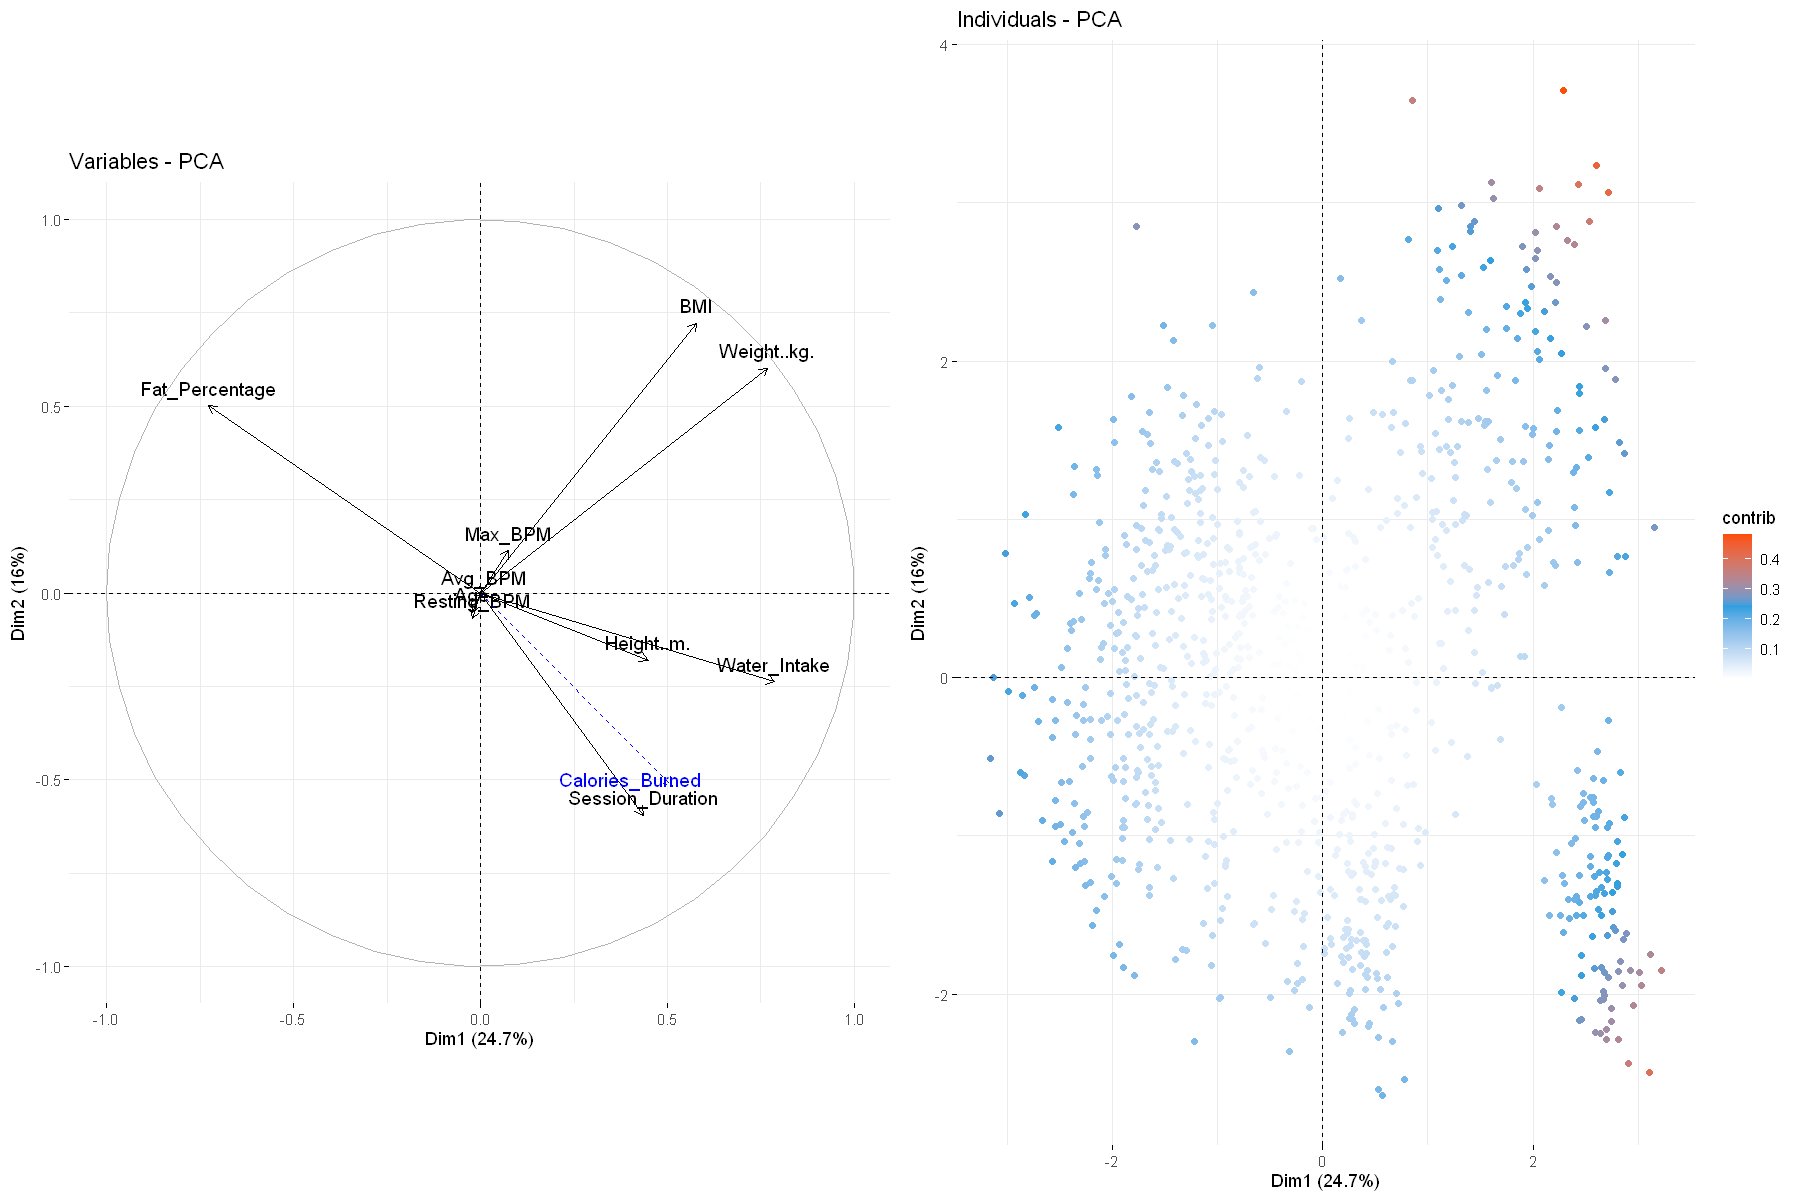

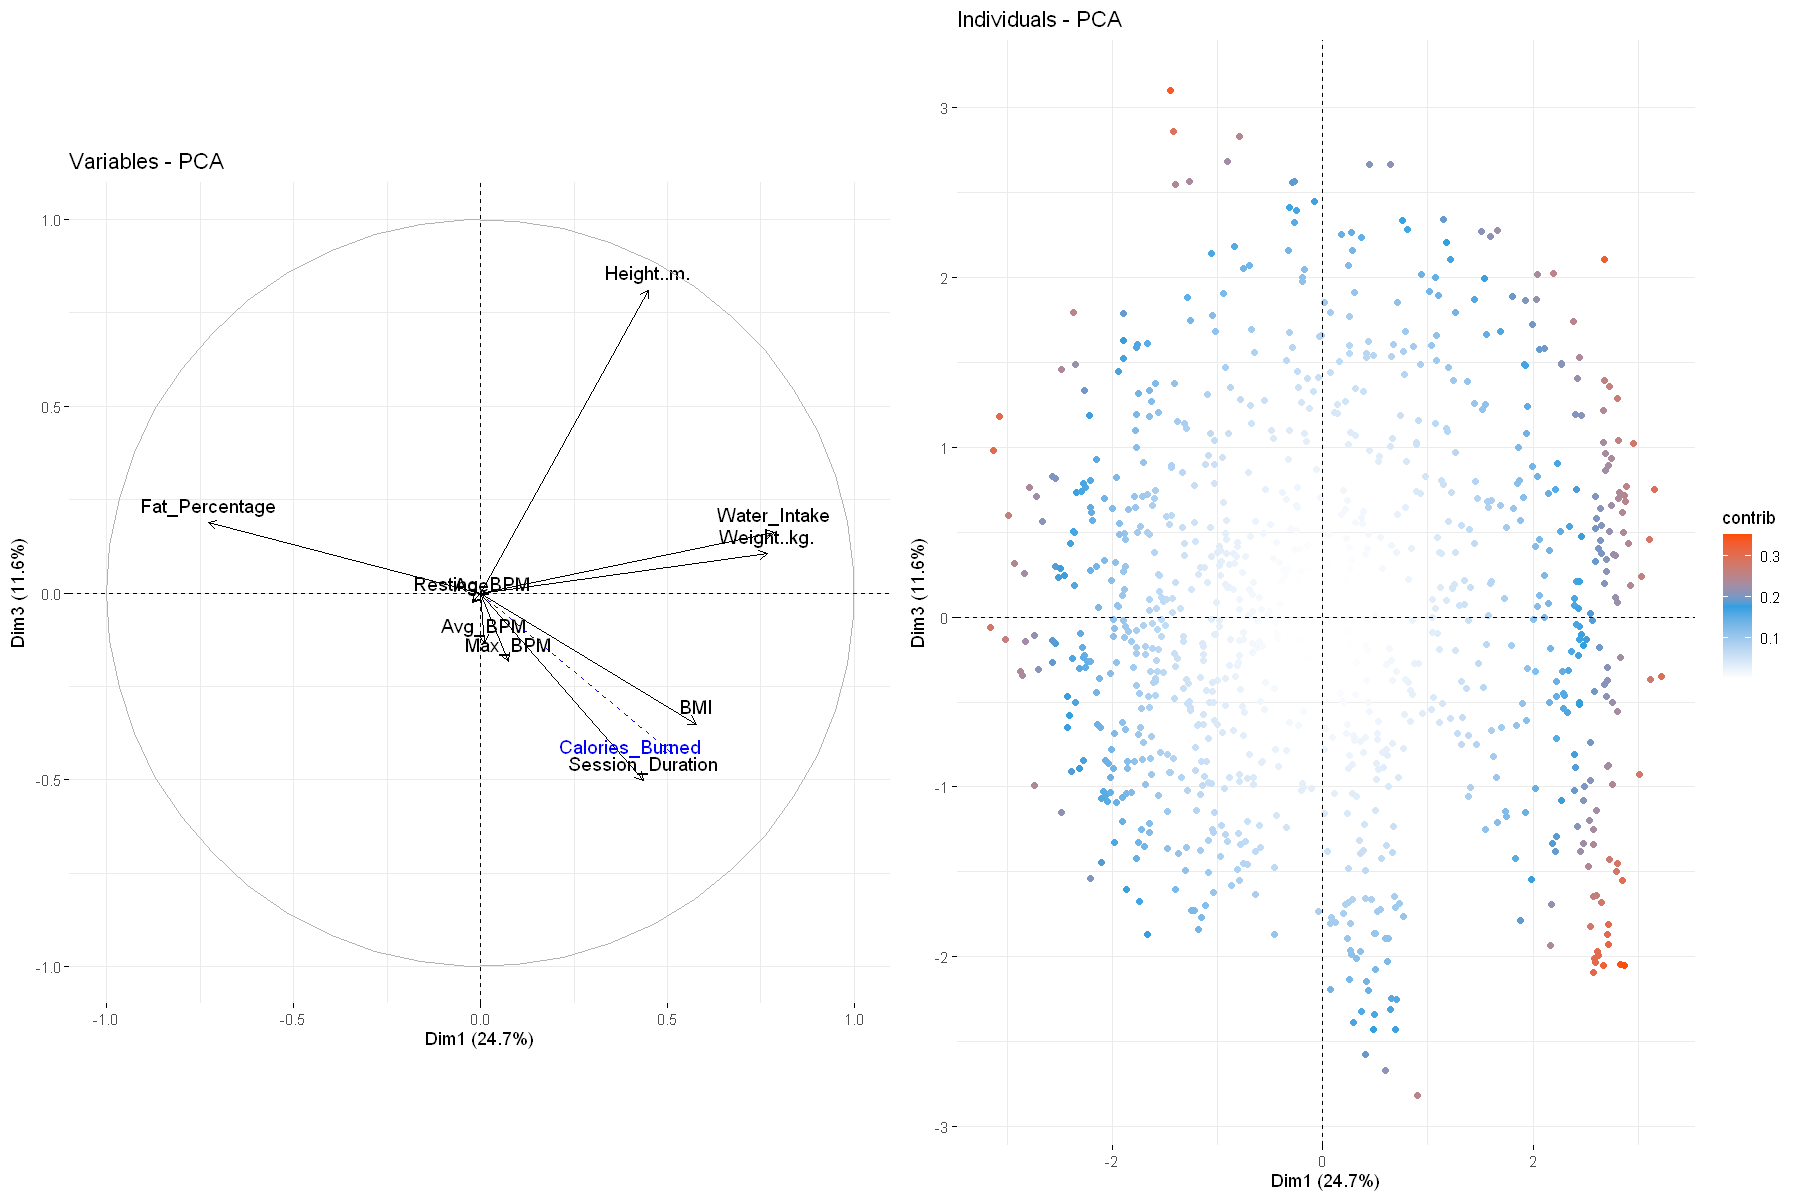

In [16]:
options(repr.plot.width=15, repr.plot.height=10)
p1 <- fviz_pca_var(acp)
p2 <- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
grid.arrange(p1,p2, ncol=2)
p3 <-fviz_pca_var(acp,axes=c(1,3))
p4<- fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))
grid.arrange(p3,p4,ncol=2)

Grâce aux graphiques ci-dessus nous pouvons expliquer quelles dimensions sont portées par quelles variables et ainsi essayer de les expliquer. Ainsi on remarque assez facilement que la dimension 1, portée par des variables comme le poids, la consommation d'eau, l'IMC et le pourcentage de masse graisseuse, représente le corps de l'individu, son profil pûrement physique. 
De plus, la dimension 2, portée par les variables poids, IMC, calories brulées et durée de la séance, représente plus le profil de l'individu en tant que sportif. La dimension 3 quant à elle est plus difficile à interpréter. 

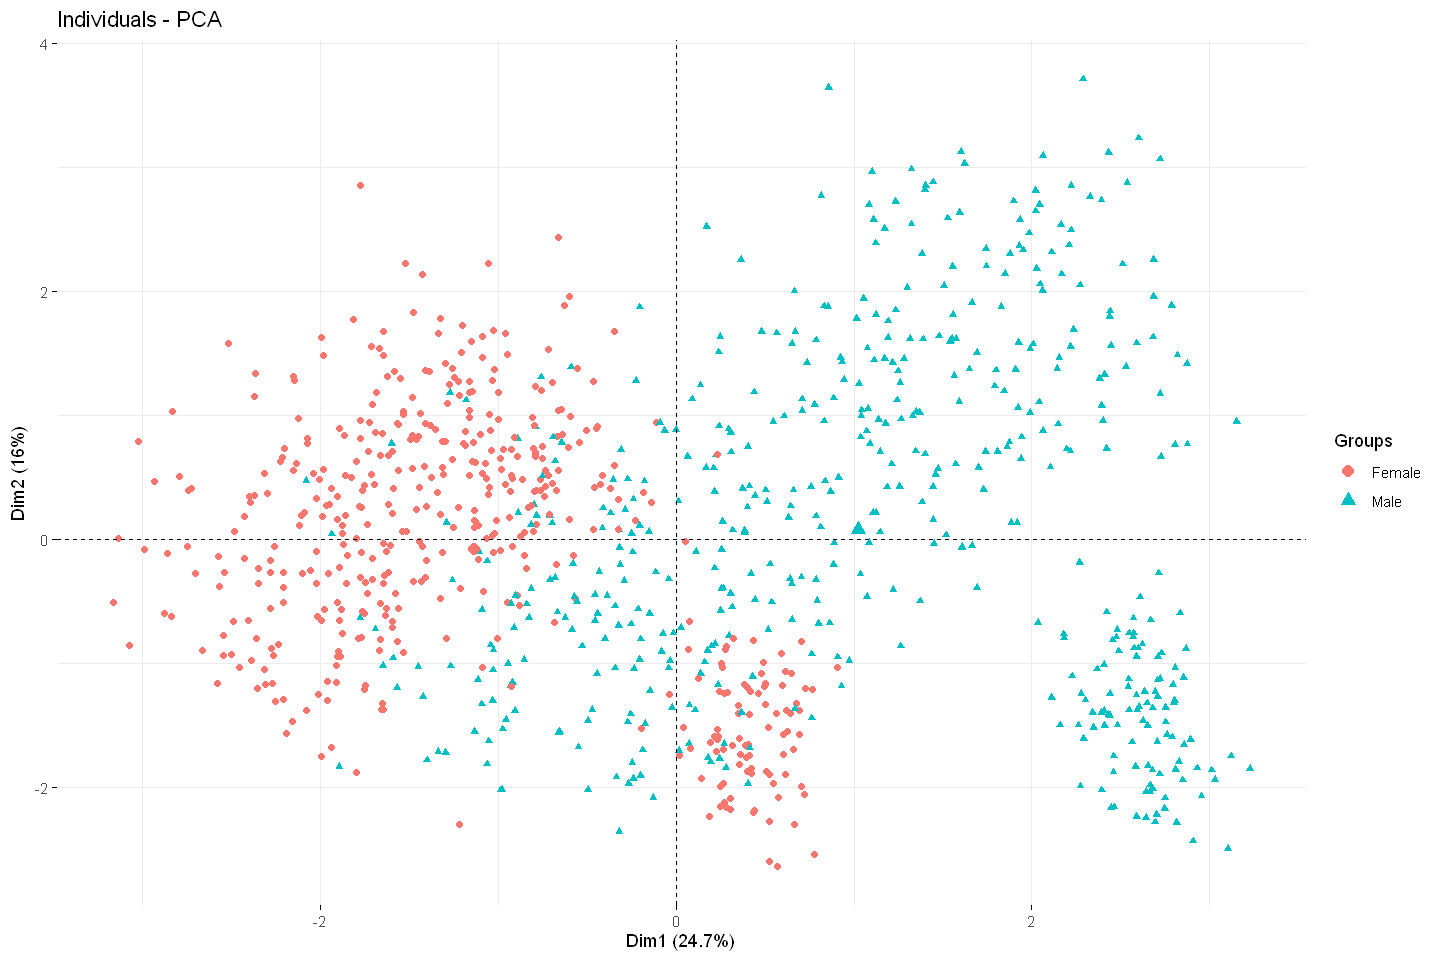

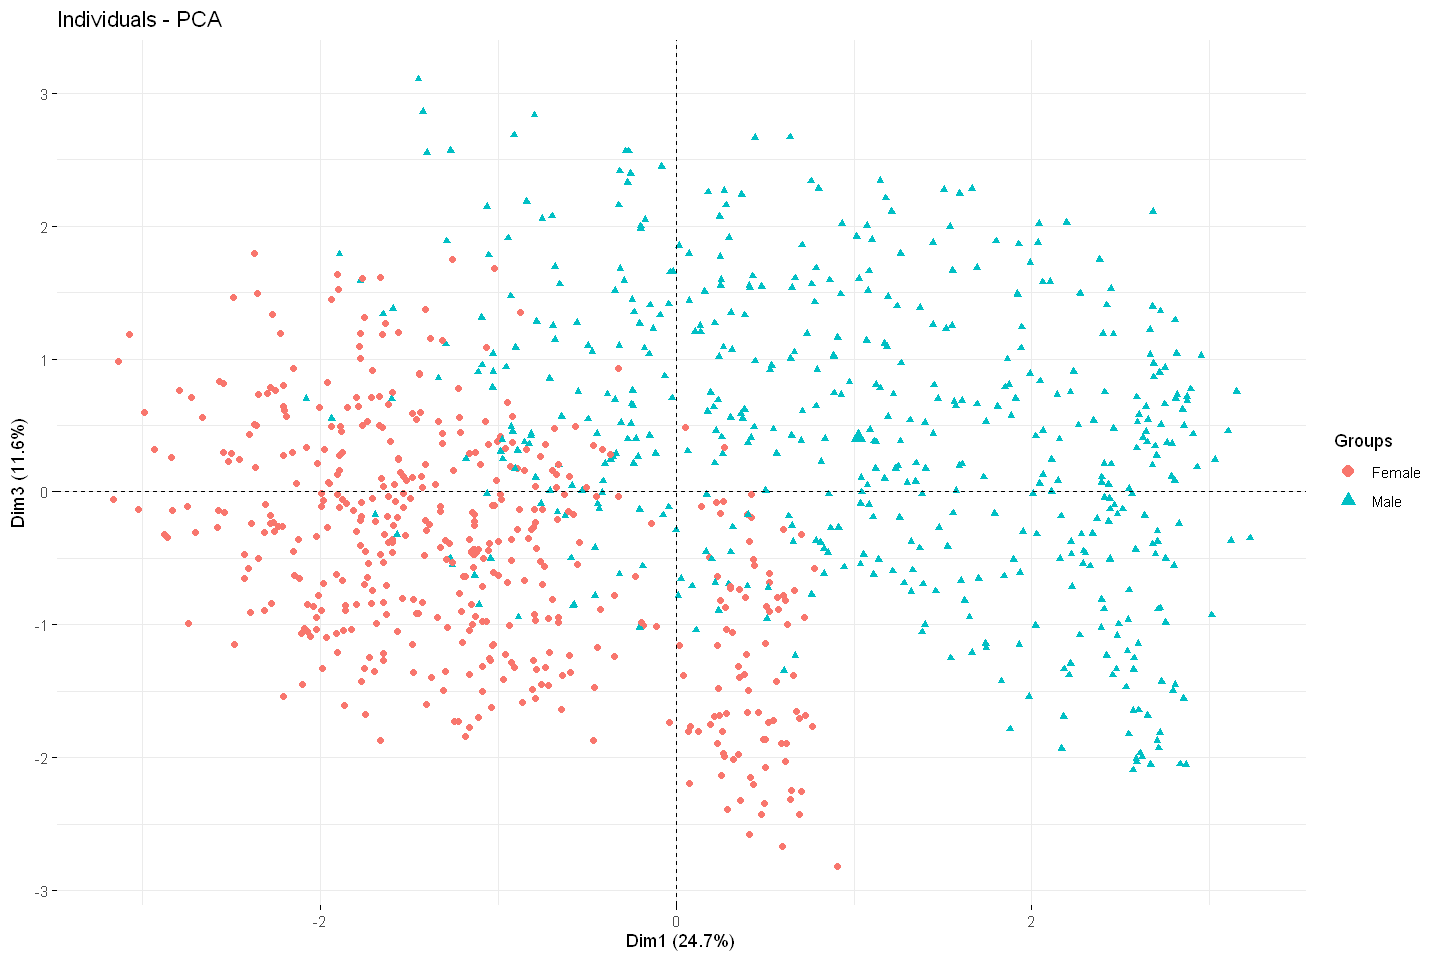

In [17]:
options(repr.plot.width=12, repr.plot.height=8)

fviz_pca_ind(acp, label="none", habillage=Gym$Gender)
fviz_pca_ind(acp, label="none", habillage=Gym$Gender, axes=c(1,3))

Dans ces projections en ACP des individus sur les dimensions 1 et 2 puis 1 et 3 certains groupes se distinguent. En effet, sur le premier graphique on distingu clairement 2 groupes se distingant du reste, ce sont un groupe de femme et un groupe d'homme que nous pourrions considérer comme les plus sportif, ce sont sûrement des individus qui brûlent le plus de calories parmi les femmes et les hommes. 

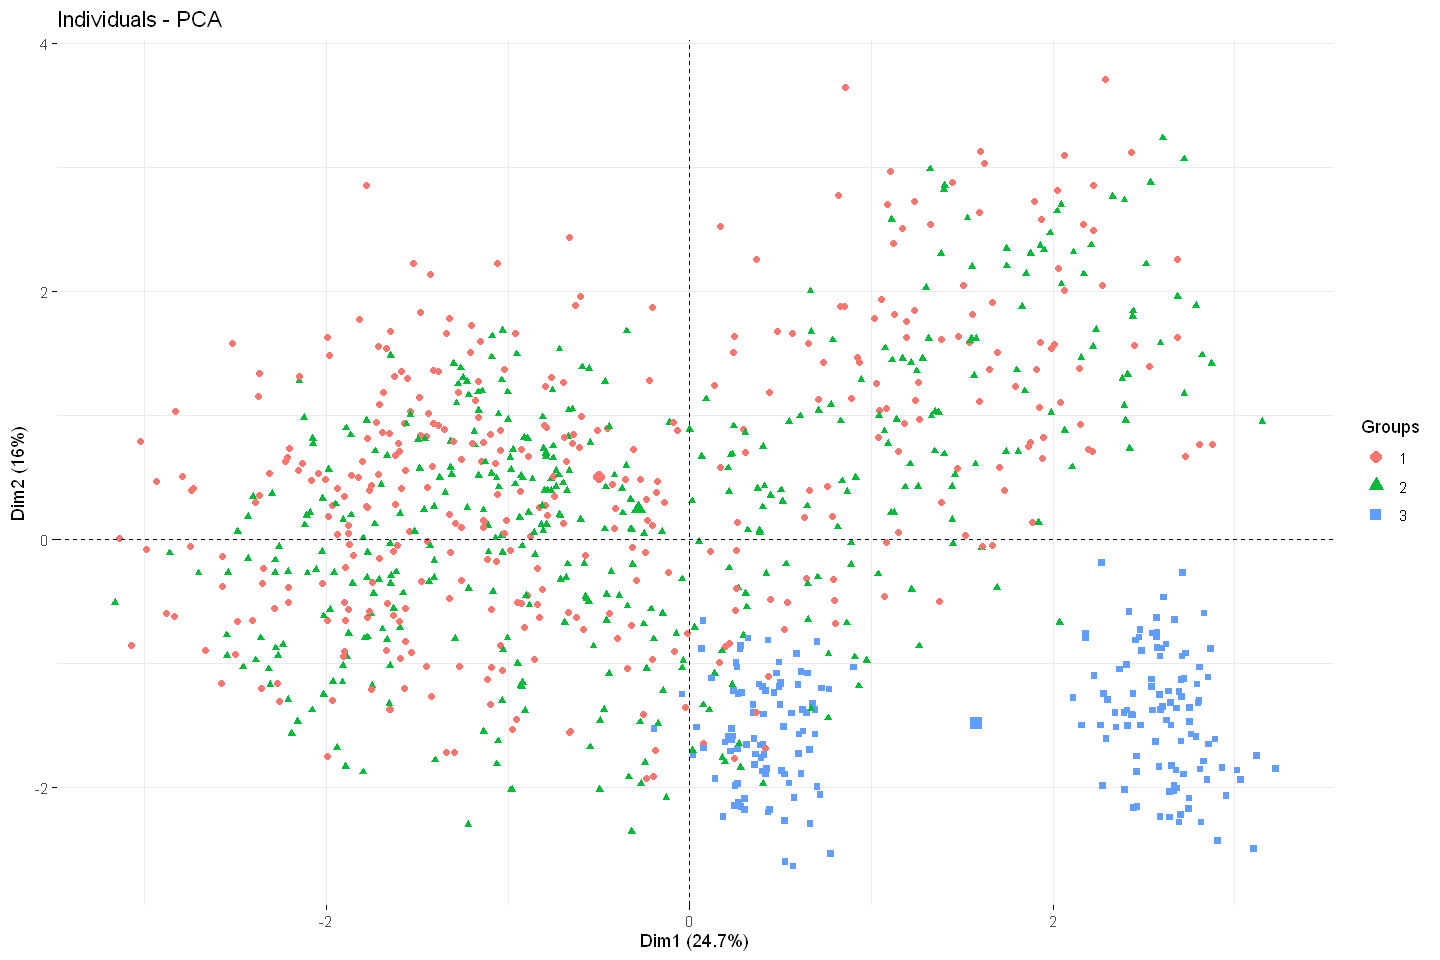

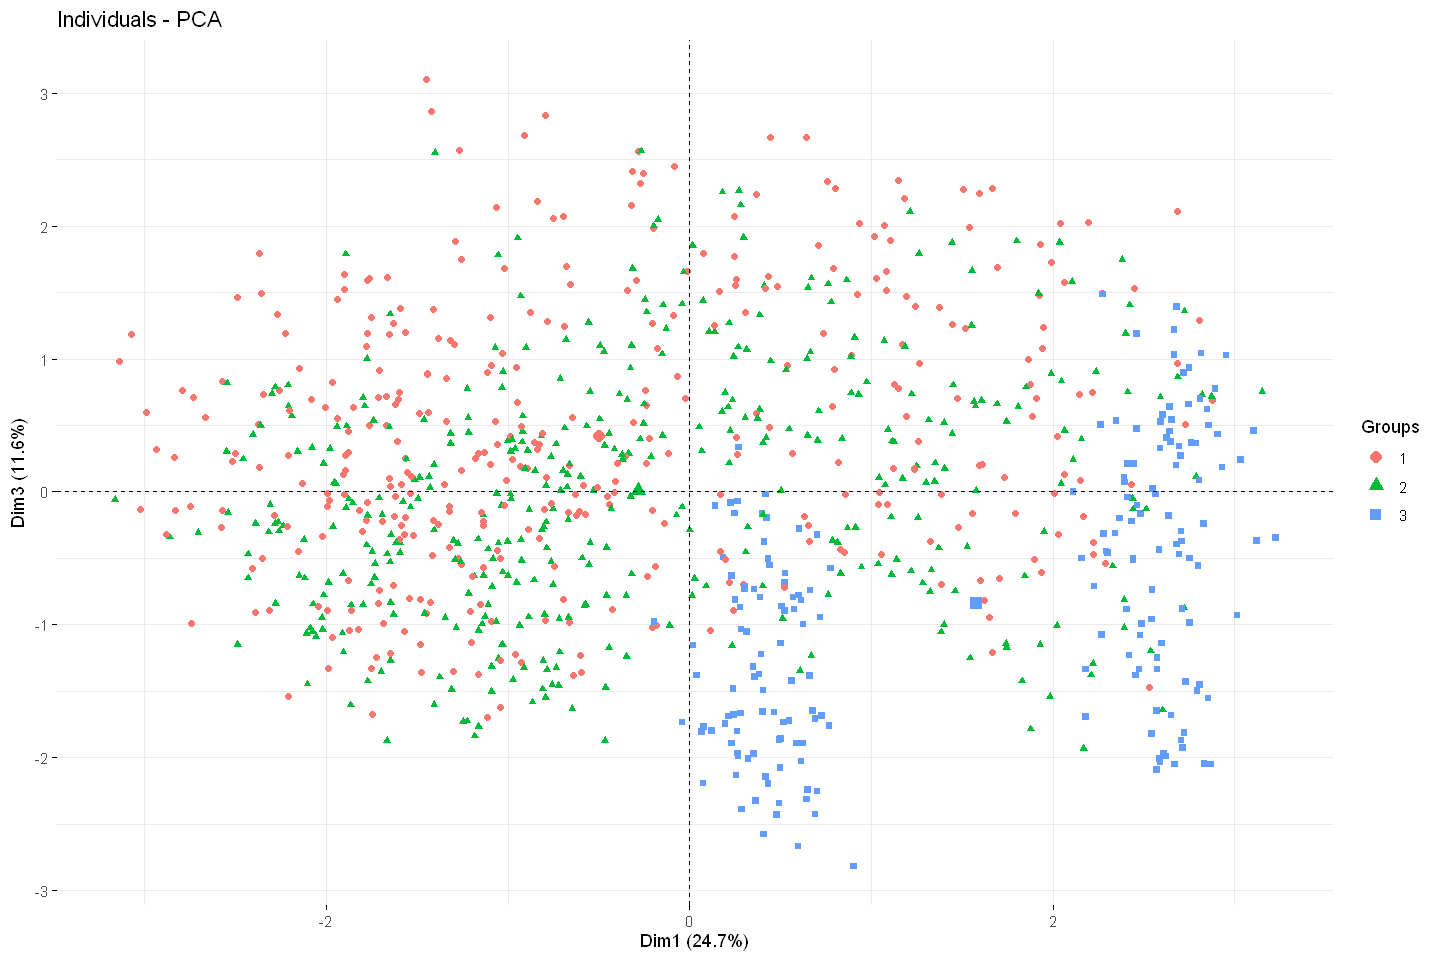

In [18]:
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level)
fviz_pca_ind(acp, label="none", habillage=Gym$Experience_Level, axes=c(1,3))

Par ces représentations, nous avons confirmé notre intuition précédente, puisque les deux groupes qui se distinguaient
correspondent à deux groupes d'individus expérimentés

# Prévision des calories brulées

Dans cette partie, nous avons pour objectif de prédire la quantité de calories brûlées par rapport aux autres variables à notre disposition. Pour cela, nous allons tester plusieurs modèles et comparer leur éfficacité.

## Séparation de la base en train/test

Avant de pouvoir réaliser nos différents modèles de prédiction, il est d'abord nécessaire de séparer nos données en deux parties. La première partie correspond à 80% de la base initiale. Elle permet d'entraîner un modèle sur les données qui lui sont fournies. La seconde partie est celle de test. Elle permettra d'appliquer le modèle entraîné et de comparer les différentes méthodes entre elles.  

In [19]:
set.seed(150) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(Gym) # nombre de lignes dans les données
nvar <- ncol(Gym) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 

In [20]:
# construction de l'échantillon d'apprentissage
datappr0 <- Gym[appri,] 
# construction de l'échantillon test
datestr0 <- Gym[testi,]

summary(datappr0)
summary(datestr0)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:374   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :404   1st Qu.: 58.02   1st Qu.:1.620   1st Qu.:170.0  
 Median :39.00                Median : 69.70   Median :1.710   Median :180.0  
 Mean   :38.57                Mean   : 73.66   Mean   :1.723   Mean   :179.8  
 3rd Qu.:49.00                3rd Qu.: 85.60   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM     Resting_BPM    Calories_Burned    Workout_Type Fat_Percentage 
 Min.   :120   Min.   :50.00   Min.   : 303.0   Cardio  :201   Min.   :10.00  
 1st Qu.:132   1st Qu.:56.00   1st Qu.: 723.5   HIIT    :175   1st Qu.:21.20  
 Median :144   Median :62.00   Median : 895.0   Strength:203   Median :26.25  
 Mean   :144   Mean   :62.12   Mean   : 909.4   Yoga    :199   Mean   :24.93  
 3rd Qu.:156   3rd Qu.:68.00   3rd Qu.:1089.8       

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female: 88   Min.   : 41.10   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :107   1st Qu.: 58.30   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.60   Median :1.700   Median :181.0  
 Mean   :39.15                Mean   : 74.62   Mean   :1.722   Mean   :180.3  
 3rd Qu.:51.00                3rd Qu.: 86.95   3rd Qu.:1.795   3rd Qu.:190.0  
 Max.   :59.00                Max.   :128.40   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Calories_Burned    Workout_Type
 Min.   :120.0   Min.   :50.00   Min.   : 319.0   Cardio  :54   
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.: 711.0   HIIT    :46   
 Median :139.0   Median :64.00   Median : 882.0   Strength:55   
 Mean   :142.8   Mean   :62.63   Mean   : 889.7   Yoga    :40   
 3rd Qu.:156.0   3rd Qu.:68.50   3rd Qu.:1025.0                 
 Max.   :169.0   Max.   :74.00   Max.   :1701.0          

Afin de rentre toutes les données comparables, on normalise l'échantillon de test et l'échantillon d'apprentissage exempté de la variable à prédire. 

In [21]:
# on normalise l'échantillon d'apprentissage
datappr=datappr0
datappr[,-c(2,8,9,11,13)]=scale(datappr0[,-c(2,8,9,11,13)])

# on normalise l'échantillon test 
# à l'aide des caractéristiques de l'échantillon d'apprentissage
datestr=datestr0
datestr[,-c(2,8,9,11,13)]=scale(datestr0[,-c(2,8,9,11,13)],
                            center=sapply(datappr0[,-c(2,8,9,11,13)],mean), # on centre avec les moyennes de l'échantillon d'apprentissage
                            scale=sapply(datappr0[,-c(2,8,9,11,13)],sd)) # on réduit avec les écart-types de l'échantillon d'apprentissage
summary(datappr)
summary(datestr)

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.6719302   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-0.8360099   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-0.0000895   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.0000000   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 0.8358308   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.7414112   Max.   : 1.619

      Age              Gender     Weight..kg.         Height..m.       
 Min.   :-1.69638   Female: 88   Min.   :-1.53774   Min.   :-1.761001  
 1st Qu.:-0.87152   Male  :107   1st Qu.:-0.72548   1st Qu.:-0.812644  
 Median : 0.11832                Median :-0.14462   Median :-0.180407  
 Mean   : 0.04853                Mean   : 0.04532   Mean   :-0.009784  
 3rd Qu.: 1.02567                3rd Qu.: 0.62750   3rd Qu.: 0.570375  
 Max.   : 1.68557                Max.   : 2.58496   Max.   : 2.190483  
    Max_BPM            Avg_BPM          Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.67193   Min.   :-1.65238   Min.   : 319.0  
 1st Qu.:-0.84614   1st Qu.:-0.90567   1st Qu.:-0.83442   1st Qu.: 711.0  
 Median : 0.10653   Median :-0.34839   Median : 0.25618   Median : 882.0  
 Mean   : 0.04924   Mean   :-0.08154   Mean   : 0.06952   Mean   : 889.7  
 3rd Qu.: 0.88599   3rd Qu.: 0.83583   3rd Qu.: 0.86965   3rd Qu.:1025.0  
 Max.   : 1.66546   Max.   : 1.74141   Max.   

In [22]:
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(200,2000)+ylim(-150,200)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

## Modèle linéaires

On s'intéresse d'abord aux modèles de type linéaire. Ceux-ci sont vastement utilisés pour leur simplicité et leur interprétabilité.

### Sans pénalisation et sans sélection de variables

La variable à expliquer étant quantitative, on utilise un de régression linéaire de type ANCOVA sans intéractions.

In [23]:
options(repr.plot.width=8, repr.plot.height=6)

# estimation du modèle sans interaction
reg.lm <-aov(Calories_Burned ~ . , data = datappr)
summary(reg.lm)
# Extraction des résidus et des valeurs ajustées de ce modèle
res.lm <- reg.lm$residuals
fit.lm <- reg.lm$fitted.values

                   Df   Sum Sq  Mean Sq   F value   Pr(>F)    
Age                 1  1370418  1370418   846.877  < 2e-16 ***
Gender              1  1258021  1258021   777.419  < 2e-16 ***
Weight..kg.         1    19288    19288    11.919 0.000586 ***
Height..m.          1      898      898     0.555 0.456480    
Max_BPM             1    13399    13399     8.280 0.004120 ** 
Avg_BPM             1  6693583  6693583  4136.433  < 2e-16 ***
Resting_BPM         1        5        5     0.003 0.955216    
Workout_Type        3   502697   167566   103.550  < 2e-16 ***
Fat_Percentage      1 19926671 19926671 12314.081  < 2e-16 ***
Experience_Level    2  9695358  4847679  2995.719  < 2e-16 ***
BMI                 1     3602     3602     2.226 0.136125    
Workout_Frequency   3    29856     9952     6.150 0.000392 ***
Session_Duration    1 17829857 17829857 11018.314  < 2e-16 ***
Water_Intake        1       33       33     0.020 0.886265    
Residuals         758  1226597     1618                

Nous allons calculer le R2 et l'erreur moyenne du modèle afin d'avoir des données comparables que nous recalculerons par la suite pour les autres modèles.

In [24]:
summary_lm <- summary.lm(reg.lm) 

R2 <- 1 - sum(summary_lm$residuals^2) / sum((datappr$Calories_Burned - mean(datappr$Calories_Burned))^2)

n <- nrow(datappr)
p <- length(coef(summary_lm)) - 1  
R2_adj <- 1 - ((1 - R2) * (n - 1)) / (n - p - 1)

# Affichage
cat("R² classique :", round(R2, 4), "\n")
cat("R² ajusté     :", round(R2_adj, 4), "\n")
MSE <- mean(summary_lm$residuals^2)
cat("MSE :", MSE, "\n")

R² classique : 0.9791 
R² ajusté     : 0.9767 
MSE : 1576.603 


Le R2 classique étant fortement élevé, on en déduit que ce modèle a un biais très faible. Cependant,sans pénalisation les modèles linéaires ont tendance à faire de l'overfitting pour un nombre de paramètres important. On se retrouve donc avec des modèles trop complexes. Cela se traduit par un R2 ajusté plus faible bien que très satisfaisant. Par la suite, on utilisera principalement la MSE, étant une valeur sûre pour comparer nos méthodes.

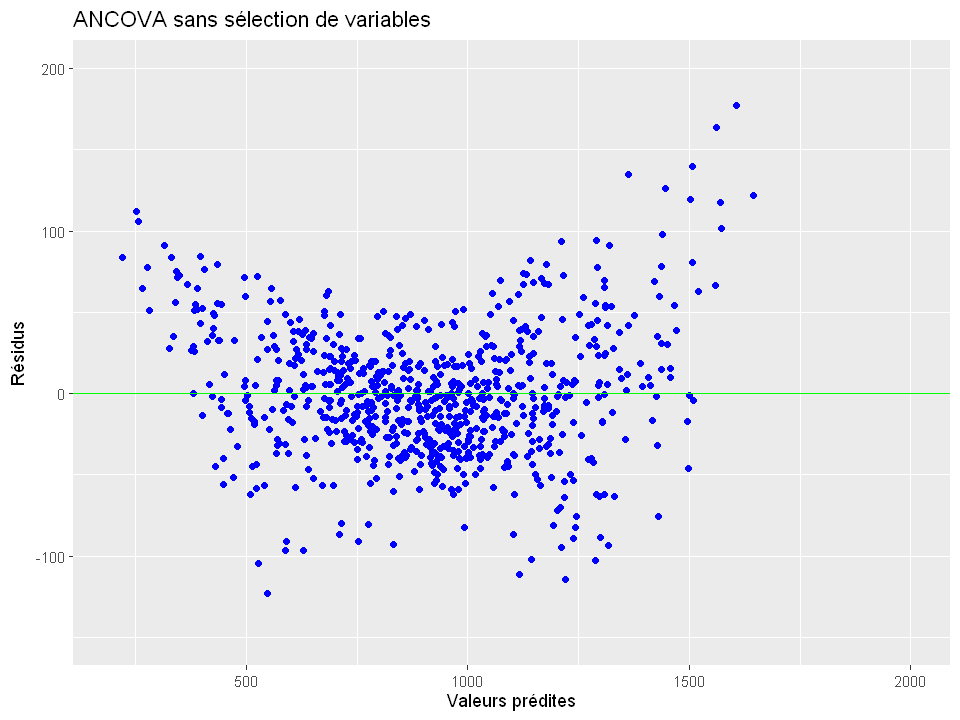

In [25]:
options(repr.plot.width=8, repr.plot.height=6)
# Graphe des résidus. 
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables")

En affichant le graphique des résidus on remarque une forme "en banane" synonyme d'un modèle peu fiable. En effet, si le modèle était bon nous observerions une ligne droit proche de la ligne y=0. Cela confirme que le modèle de régression linéaire sans pénalisation ni sélection de variable n'est pas très efficace pour la prédiction des calories brulées.

### Avec pénalisation

Il est nécessaire de trouver un équilibre entre le biais et la variance. En effet, dans certaines situations, il est préférable de choisir un modèle biaisé, qui permet de réduire de manière importante que de choisir un modèle à R2 élevé. A cet effet, nous allons utiliser différents critères de pénalisation sur les modèles trop complexes. 

#### Sans sélection de variables (Ridge)

In [26]:
lambdas <- seq(0.01, 10, length.out = 100)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

# Entraînement du modèle avec validation croisée
regRidgeCV <- cv.glmnet(x = x.mat, 
                        y = datappr[, 8], 
                        alpha = 0,                  # alpha = 0 => Ridge
                        lambda = lambdas, 
                        nfolds = 5,
                        standardize = TRUE)

# Meilleur paramètre lambda
lambda_opt <- regRidgeCV$lambda.min
cat("Meilleur paramètre = ", lambda_opt, "\n")

Meilleur paramètre =  0.2118182 


LASSO avec lambda.1se - MSE : 1642.8 


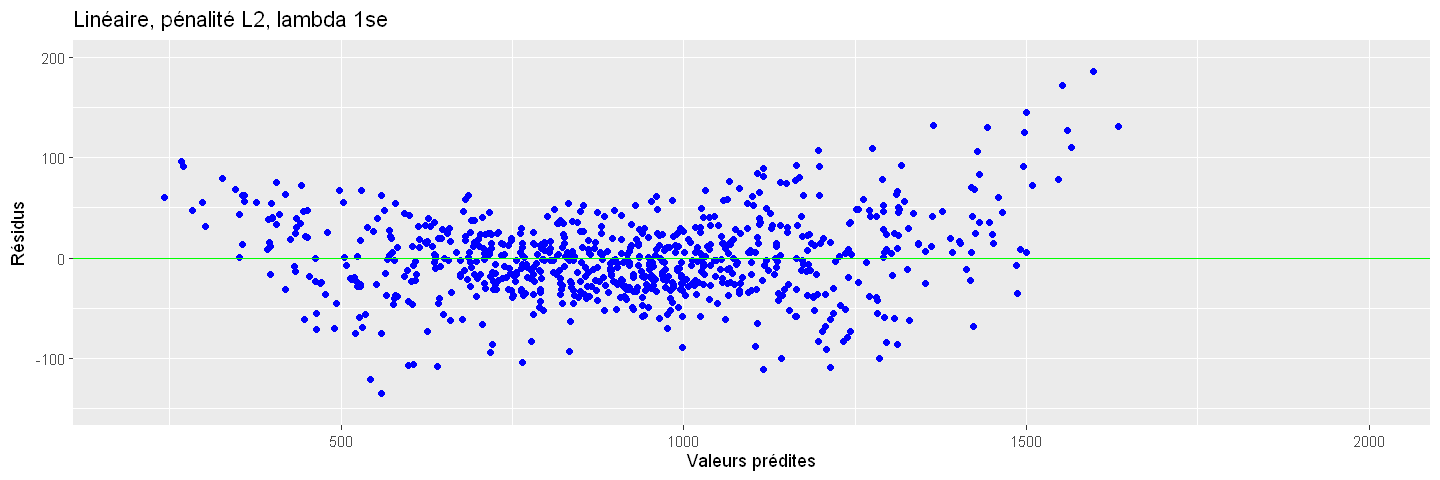

In [27]:
fit.ridge <- predict(regRidgeCV, s = "lambda.1se", newx = x.mat)

# Résidus
res.ridge <- datappr$Calories_Burned - fit.ridge

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.ridge, res.ridge, "Linéaire, pénalité L2, lambda 1se")

mse_ridge <- mean(res.ridge^2)
cat("LASSO avec lambda.1se - MSE :", round(mse_ridge, 2), "\n")




#### Avec sélection de variables (Cp/AIC/BIC et Lasso)

##### LASSO

Afin de simplifier le modèle nous allons effectuer une sélection de variables à l'aide de la méthode LASSO.

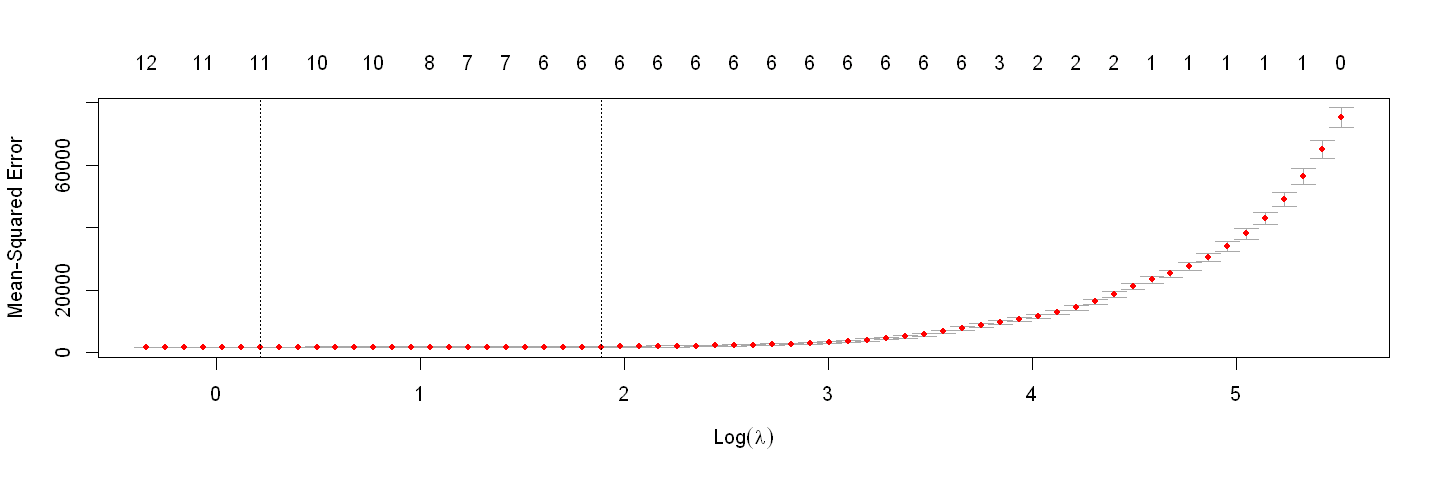

[1] "CV estimate of lambda : 6.596"

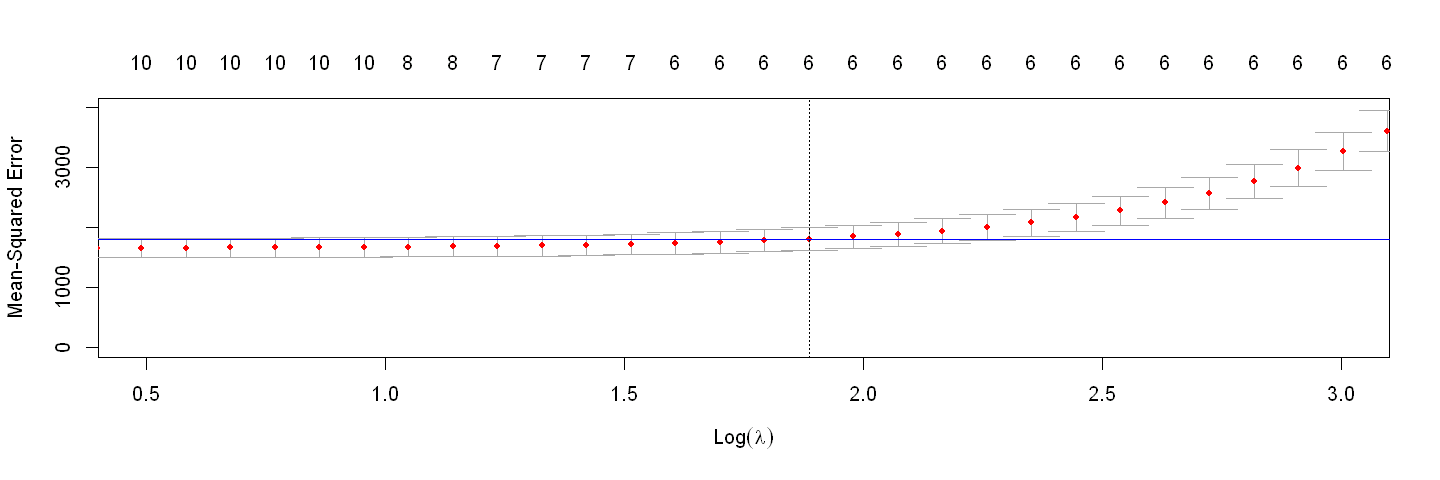

In [28]:

# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Calories_Burned ~ . - 1, data = datappr)

reg.lasso.cv <- cv.glmnet(y = datappr[, 8], x = x.mat)
plot(reg.lasso.cv)
plot(reg.lasso.cv,xlim=c(0.5,3),ylim=c(0,4000))
abline(h=reg.lasso.cv$cvm[c(reg.lasso.cv$index)[2]],col="blue")

paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.1se, 3))

Comme expliqué précemment grâce à ce graphique on peut comparer l'évolution de l'erreur moyenne en fonction de l'évolution du log du paramètre de pénalisation. Ainsi, un lambda plus petit va créer un modle plus complexe mais plus fiable tandis qu'un lambda plus grand va simplifier le modèle mais augmenter l'erreur. Ici, afin de simplifier le modèle au maximum sans trop augmenter l'erreur nous allons choisir un log de lambda environ égal à 1.7, qui nous donne un modèle à 6 variables. Ainsi le log de lambda choisi a une erreur moyenne compris dans l'intervalle d'erreur minimal du modèle.

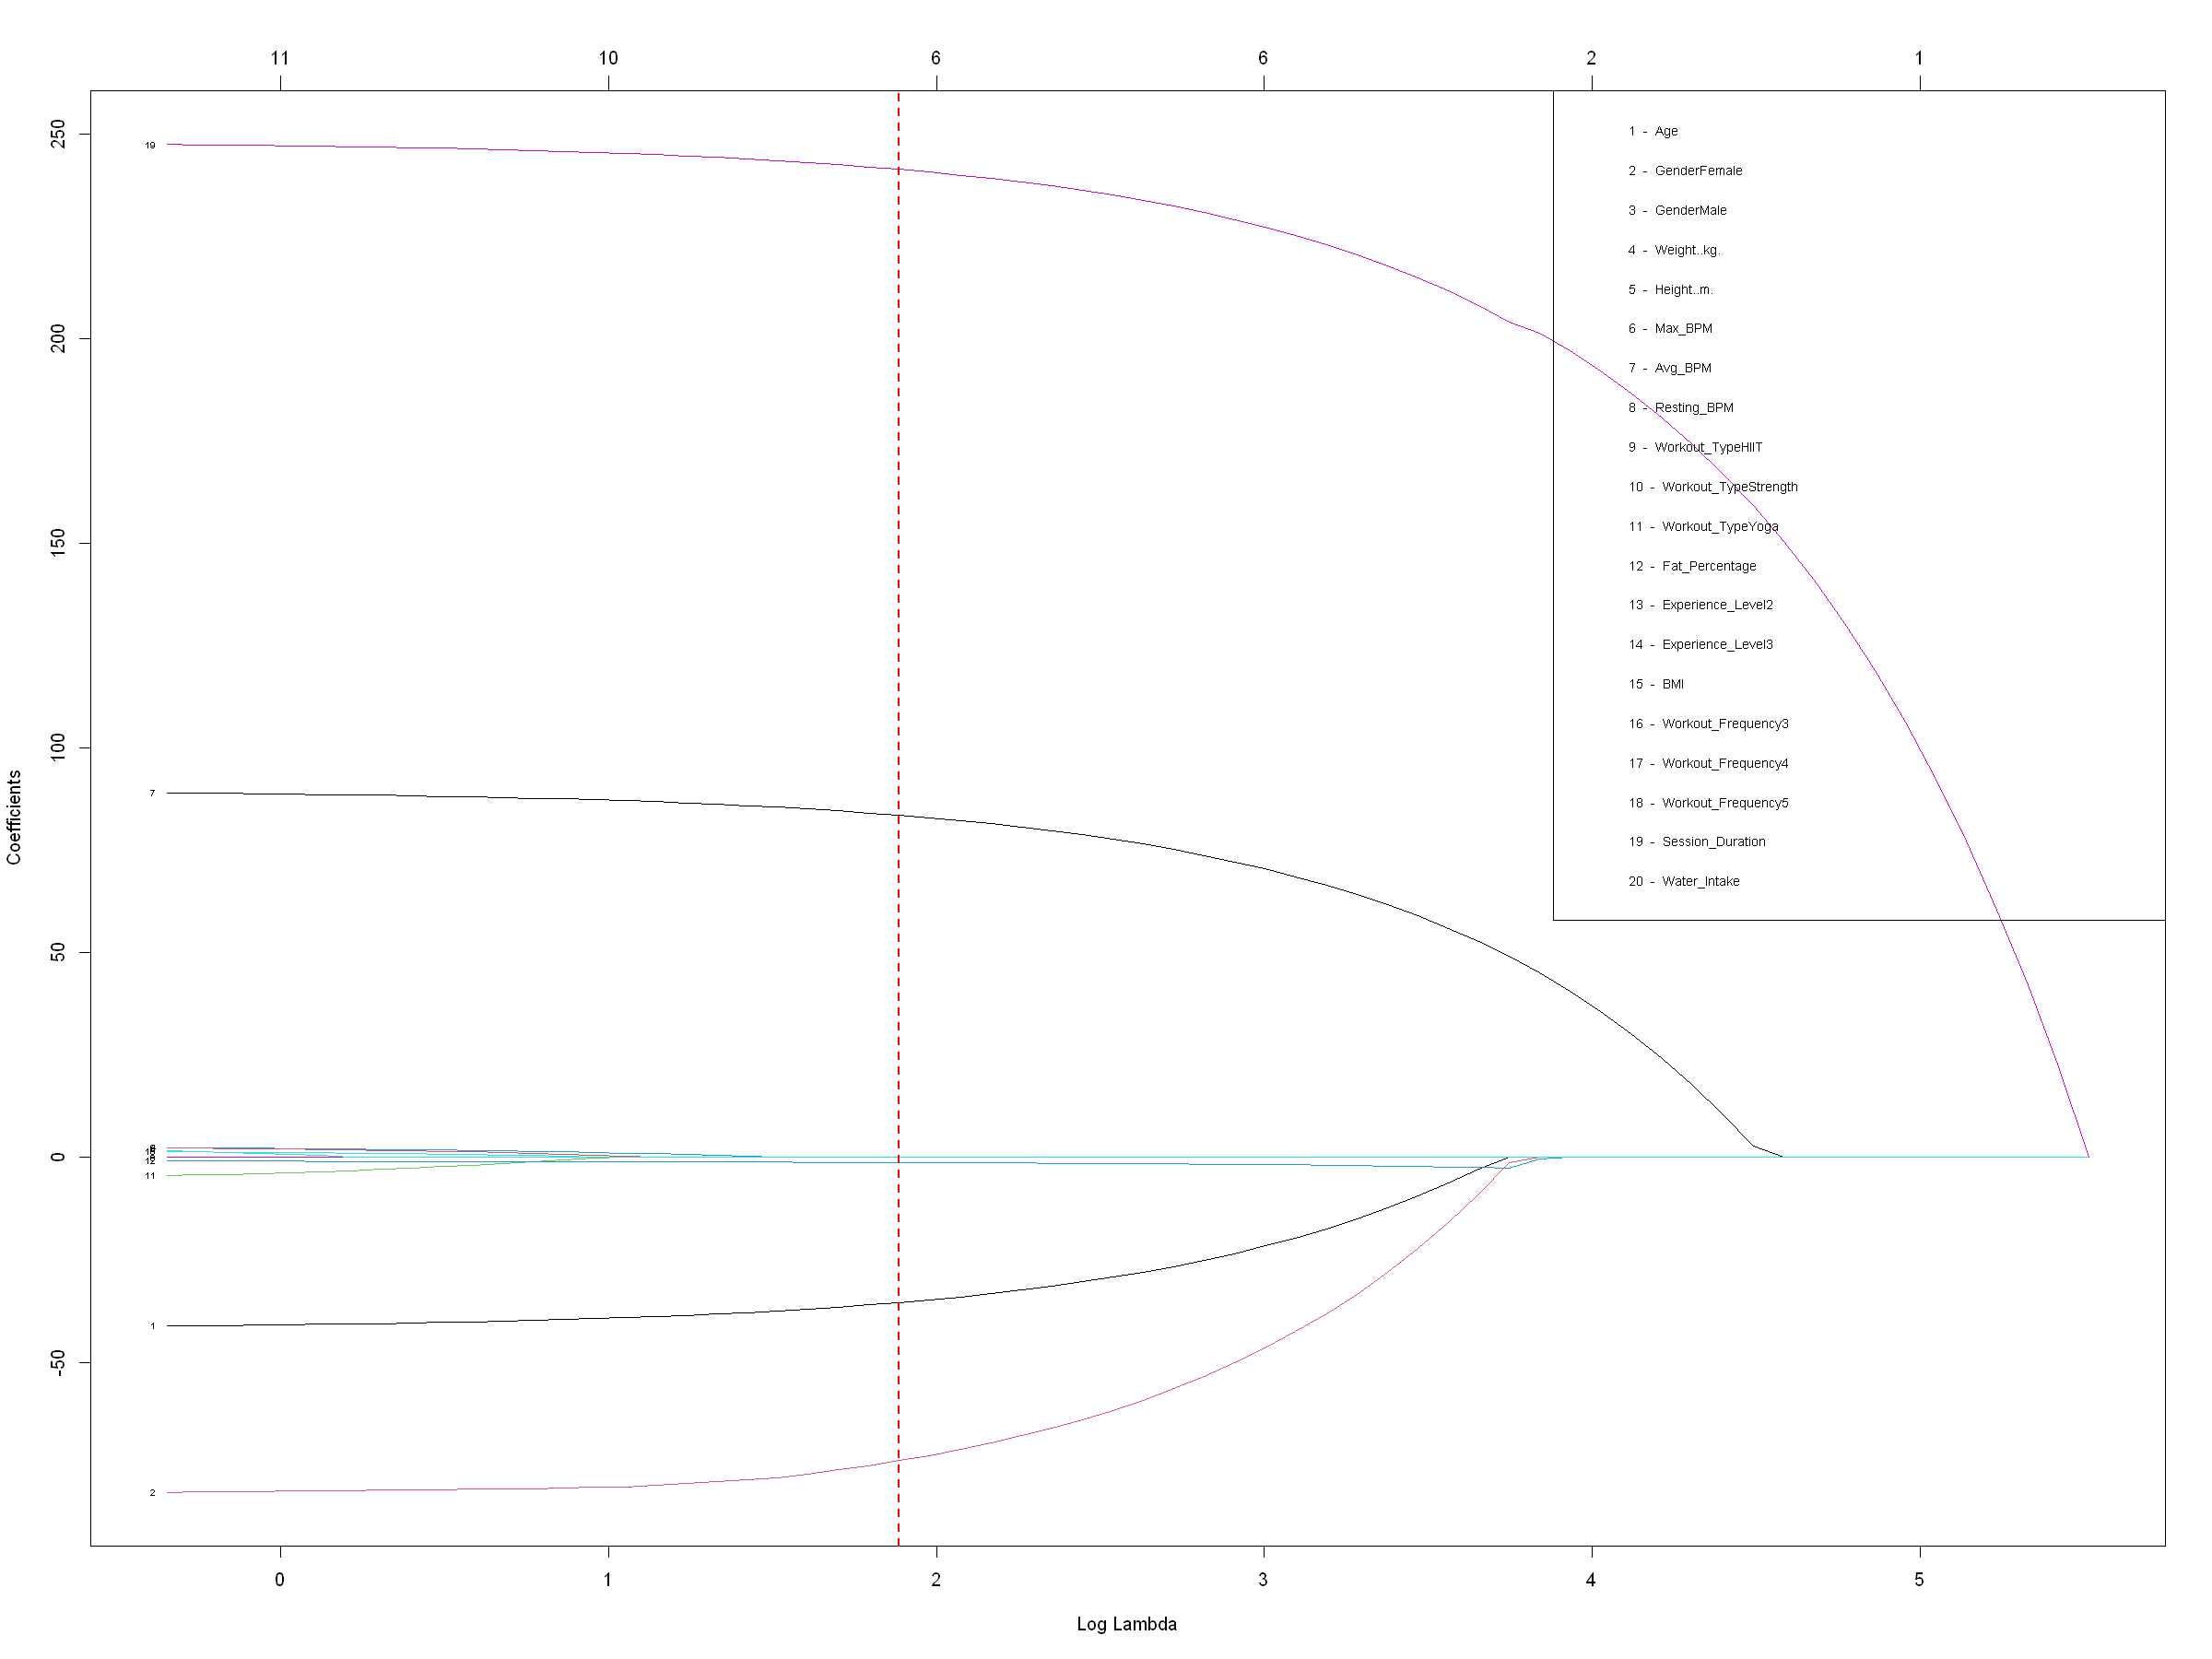

In [29]:

reg.lasso <- glmnet(y = datappr$Calories_Burned, x = x.mat)

options(repr.plot.width = 20, repr.plot.height = 15)

plot(reg.lasso, xvar = "lambda", label = TRUE)


abline(v = log(reg.lasso.cv$lambda.1se), col = "red", lty = 2, lwd = 2)

legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)), cex = 0.7)



Le graphique ci-dessus représente l'évolution des coefficients associés à chaque variable en fonction du log du paramètre de pénalisation $\lambda$. A l'aide de ce graphique, nous pouvons visualiser le svariables conservées par le lasso pour le lambda optimal (ligne rouge verticale).
Le lambda trouvé en R pourra être relativement différent de celui trouvé en python car on observe un "plateau" des coéfficient qui s'étale sur une grande plage de log(lambda). La sélection des variables ne sera donc pas affectée par cette différence. 

In [30]:
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.1se")

21 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           9.449802e+02
Age                  -3.542280e+01
GenderFemale         -7.406577e+01
GenderMale            1.278643e-11
Weight..kg.           .           
Height..m.            .           
Max_BPM               .           
Avg_BPM               8.358138e+01
Resting_BPM           .           
Workout_TypeHIIT      .           
Workout_TypeStrength  .           
Workout_TypeYoga      .           
Fat_Percentage       -1.203725e+00
Experience_Level2     .           
Experience_Level3     .           
BMI                   .           
Workout_Frequency3    .           
Workout_Frequency4    .           
Workout_Frequency5    .           
Session_Duration      2.413843e+02
Water_Intake          .           

D'après ce critère, les variables les plus intéressantes pour prédire les calories brulées sont: la durée de la session, le BPM moyen, le genre (pour éviter les redondances, la modalité principales gardée est le sexe féminin) et l'age. 

Warning message:
"Removed 1 row containing missing values or values outside the scale range (`geom_point()`)."


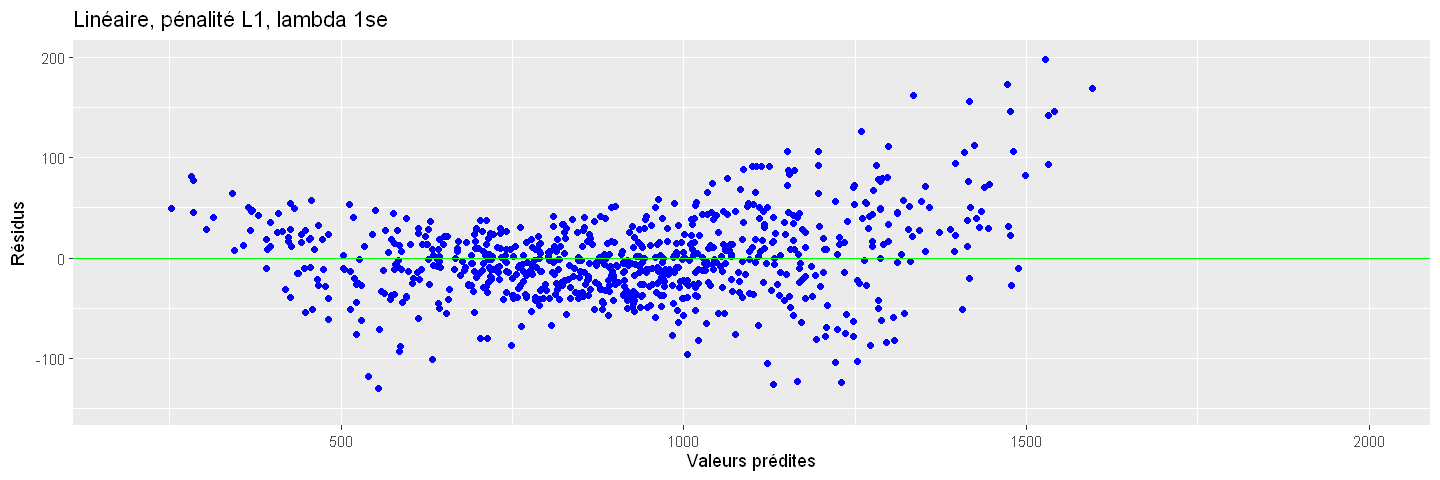

In [31]:
fit.lasso <- predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso <- datappr$Calories_Burned - fit.lasso 

# Graphe des résidus
options(repr.plot.width = 12, repr.plot.height = 4)
gplot.res(fit.lasso, res.lasso, "Linéaire, pénalité L1, lambda 1se") 

In [32]:
mse_lasso <- mean(res.lasso^2)
cat("LASSO avec lambda.1se - MSE :", round(mse_lasso, 2), "\n")


LASSO avec lambda.1se - MSE : 1788.99 


 BIZARRE QUE MSE SI DIFFÉRENTE AVEC PYTHON (DEMANDER MERCREDI)

##### AIC

In [33]:
# Estimation du modèle avec toutes les interactions d'ordre 2
reg.glm <- glm(Calories_Burned ~ . , data = datappr)
# Recherche du meilleur modèle au sens 
# du critère d'Akaïke par méthode descendante
reg.glm.aic <- step(reg.glm, direction = "backward")


y_pred <- predict(reg.glm.aic, newdata = datappr)
y_true <- datappr$Calories_Burned
mse_aic <- mean((y_true - y_pred)^2)

# Affichage
cat("MSE du modèle (stepwise) :", round(mse_aic, 2), "\n")

Start:  AIC=7978.3
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  7974.0
- Workout_Type       3  1232565  7976.1
- Water_Intake       1  1226630  7976.3
- Max_BPM            1  1226900  7976.5
- Experience_Level   2  1231522  7977.4
- Fat_Percentage     1  1229290  7978.0
<none>                  1226597  7978.3
- Weight..kg.        1  1230436  7978.7
- BMI                1  1231660  7979.5
- Height..m.         1  1232970  7980.3
- Resting_BPM        1  1234421  7981.3
- Gender             1  1505702  8135.8
- Age                1  2560041  8548.7
- Avg_BPM            1  7311728  9365.2
- Session_Duration   1 19056374 10110.5

Step:  AIC=7974.04
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

##### BIC

In [34]:
n <- nrow(datappr)
reg.glm <- glm(Calories_Burned ~ . , data = datappr)

# Sélection descendante selon le BIC
reg.glm.bic <- step(reg.glm, direction = "backward", k = log(n))


y_pred <- predict(reg.glm.bic, newdata = datappr)
y_true <- datappr$Calories_Burned
mse_bic <- mean((y_true - y_pred)^2)

# Affichage
cat("MSE du modèle (stepwise) :", round(mse_bic, 2), "\n")

Start:  AIC=8071.44
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_Type + Fat_Percentage + Experience_Level + 
    BMI + Workout_Frequency + Session_Duration + Water_Intake

                    Df Deviance     AIC
- Workout_Frequency  3  1229338  8053.2
- Workout_Type       3  1232565  8055.2
- Experience_Level   2  1231522  8061.2
- Water_Intake       1  1226630  8064.8
- Max_BPM            1  1226900  8065.0
- Fat_Percentage     1  1229290  8066.5
- Weight..kg.        1  1230436  8067.2
- BMI                1  1231660  8068.0
- Height..m.         1  1232970  8068.8
- Resting_BPM        1  1234421  8069.7
<none>                  1226597  8071.4
- Gender             1  1505702  8224.3
- Age                1  2560041  8637.2
- Avg_BPM            1  7311728  9453.7
- Session_Duration   1 19056374 10199.0

Step:  AIC=8053.2
Calories_Burned ~ Age + Gender + Weight..kg. + Height..m. + Max_BPM + 
    Avg_BPM + Resting_BPM + Workout_

##### Prévision de l'échantillon test

In [35]:
newx <- model.matrix(Calories_Burned ~ . - 1, data = datestr)

# Calcul des prévisions pour le modèle Ridge
pred.glm.ridge <- predict(regRidgeCV, newx = newx, s=lambda_opt)
# Erreur quadratique moyenne de prévision (MSE)
mse_ridge <- mean((pred.glm.ridge - datestr$Calories_Burned)^2)
cat("MSE Ridge :", round(mse_ridge, 4), "\n")


# Calcul des prévisions pour le modèle Lasso 
    pred.glm.lasso <- predict(reg.lasso.cv, newx = newx, s="lambda.1se")
# Erreur quadratique moyenne de prévision (MSE)
mse_lasso <- mean((pred.glm.lasso - datestr$Calories_Burned)^2)
cat("MSE Lasso :", round(mse_lasso, 4), "\n")



#pred.glm.aic <- as.vector(pred.glm.aic)
#pred.glm.bic <- as.vector(pred.glm.bic)
# Calcul des prévisions pour le modèle backward AIC
pred.glm.aic <- predict(reg.glm.aic, newx = newx, type = "response")
# Erreur quadratique moyenne de prévision (MSE)
mse_aic <- mean((pred.glm.aic - datestr$Calories_Burned)^2)
cat("MSE Backward AIC :", round(mse_aic, 4), "\n")


# Calcul des prévisions pour le modèle BIC
pred.glm.bic <- predict(reg.glm.bic, newx = newx, type = "response")
# Erreur quadratique moyenne de prévision (MSE)
mse_bic <- mean((pred.glm.bic - datestr$Calories_Burned)^2)
cat("MSE BIC :", round(mse_bic, 4), "\n")

MSE Ridge : 1382.395 
MSE Lasso : 1441.777 


Warning message in pred.glm.aic - datestr$Calories_Burned:
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"


MSE Backward AIC : 146948.7 


Warning message in pred.glm.bic - datestr$Calories_Burned:
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"


MSE BIC : 146989.9 


hmmmmm chelou 

## Analyse discriminante : SVM/SVR

      Age              Gender     Weight..kg.        Height..m.     
 Min.   :-1.69638   Female:374   Min.   :-1.5897   Min.   :-1.7610  
 1st Qu.:-0.87152   Male  :404   1st Qu.:-0.7385   1st Qu.:-0.8126  
 Median : 0.03584                Median :-0.1871   Median :-0.1014  
 Mean   : 0.00000                Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.86070                3rd Qu.: 0.5637   3rd Qu.: 0.6099  
 Max.   : 1.68557                Max.   : 2.6558   Max.   : 2.1905  
    Max_BPM            Avg_BPM            Resting_BPM       Calories_Burned 
 Min.   :-1.71221   Min.   :-1.6719302   Min.   :-1.65238   Min.   : 303.0  
 1st Qu.:-0.84614   1st Qu.:-0.8360099   1st Qu.:-0.83442   1st Qu.: 723.5  
 Median : 0.01993   Median :-0.0000895   Median :-0.01647   Median : 895.0  
 Mean   : 0.00000   Mean   : 0.0000000   Mean   : 0.00000   Mean   : 909.4  
 3rd Qu.: 0.88599   3rd Qu.: 0.8358308   3rd Qu.: 0.80148   3rd Qu.:1089.8  
 Max.   : 1.66546   Max.   : 1.7414112   Max.   : 1.619


Call:
svm(formula = datappr$Calories_Burned ~ ., data = datappr)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.05 
    epsilon:  0.1 


Number of Support Vectors:  335






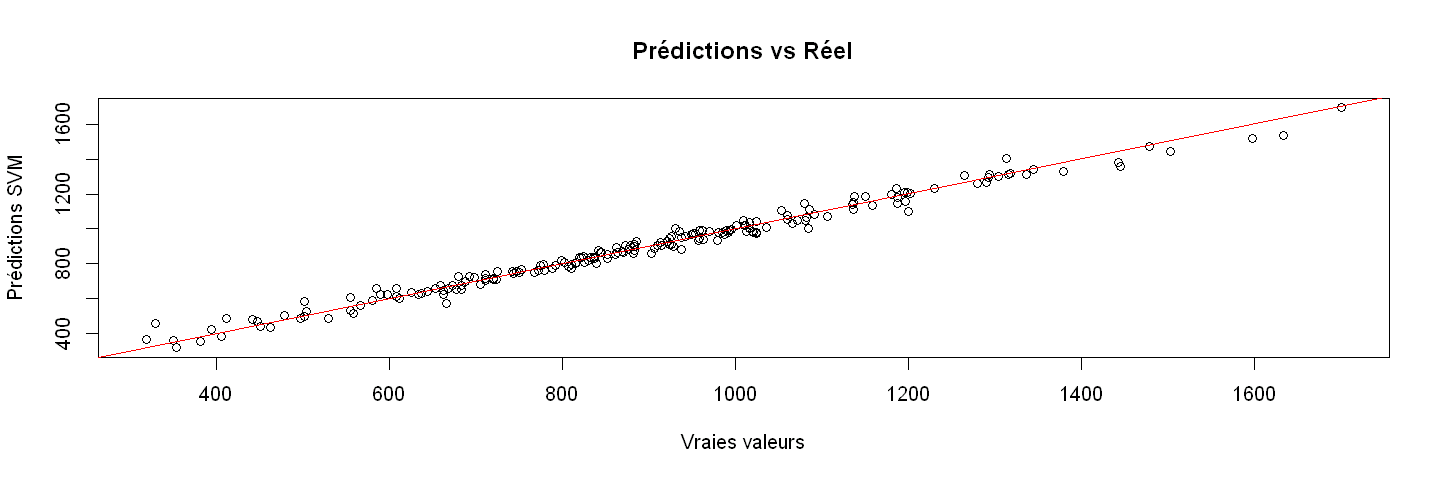

In [54]:
#install.packages("e1071")
library(e1071)
summary(datappr)
svm.reg0 = svm(datappr$Calories_Burned~., data = datappr)
summary(svm.reg0)

pred <- predict(svm.reg0, newdata = datestr)
plot(datestr$Calories_Burned, pred,
     xlab = "Vraies valeurs",
     ylab = "Prédictions SVM",
     main = "Prédictions vs Réel")
abline(0, 1, col = "red")  # ligne y=x
plot(svm.reg0, data = datappr)

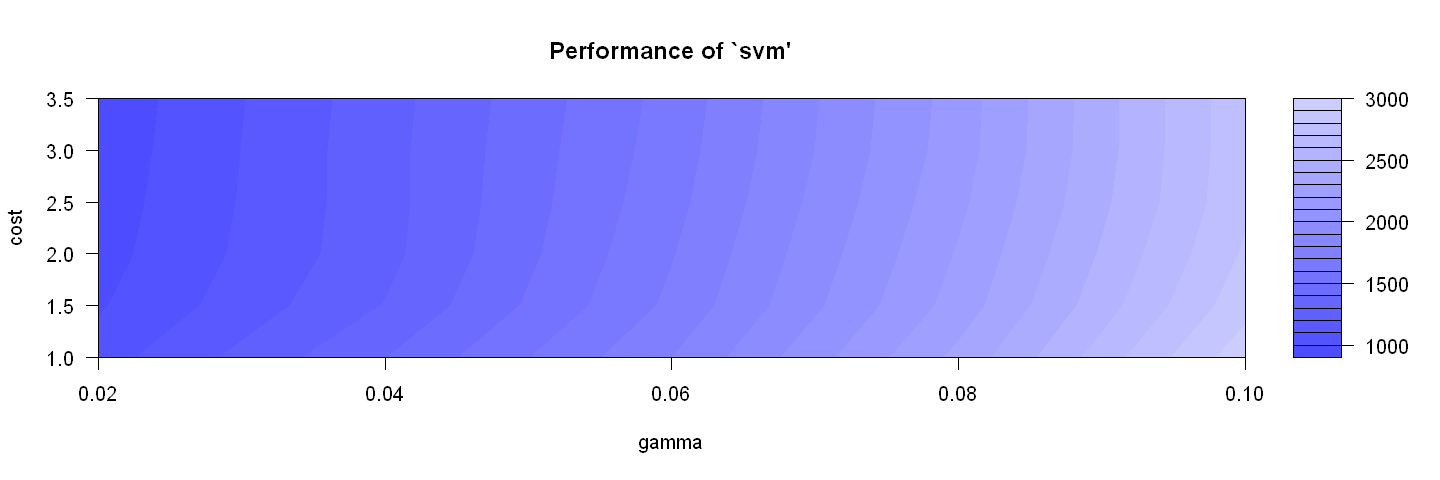

In [55]:
#set.seed(2021)
#str(datappr)
#sapply(datappr, length)
#summary(datappr)
#colSums(is.na(datappr))
svm.reg.tune = tune.svm(Calories_Burned ~ ., data = datappr, type = "eps-regression", cost = c(1, 1.5, 2, 2.5, 3, 3.5), gamma = seq(0.02, 0.1, by = 0.02))
#traceback()
plot(svm.reg.tune)

In [39]:
svm.reg = svm(Calories_Burned ~ ., data = datappr, cost = 100, 
    gamma = svm.reg.tune$best.parameters$gamma) #svm.reg.tune$best.parameters$cost
summary(svm.reg)


Call:
svm(formula = Calories_Burned ~ ., data = datappr, cost = 100, gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.02 
    epsilon:  0.1 


Number of Support Vectors:  280






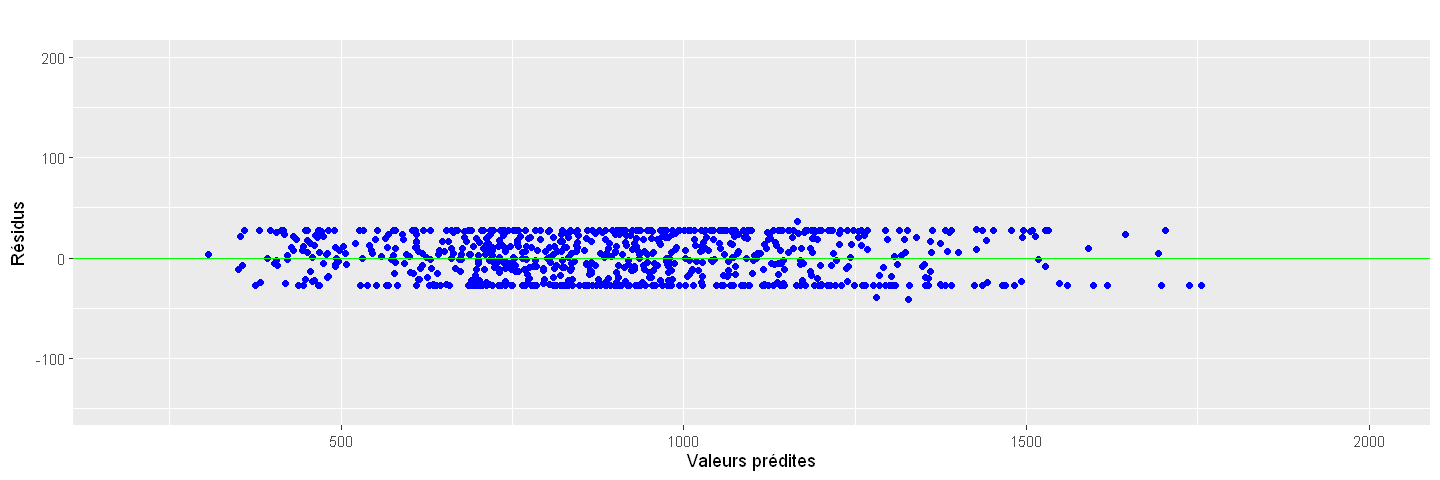

In [40]:
fit.svmr=fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-datappr[,"Calories_Burned"]
gplot.res(fit.svmr,res.svmr,titre="")

## Discrimination

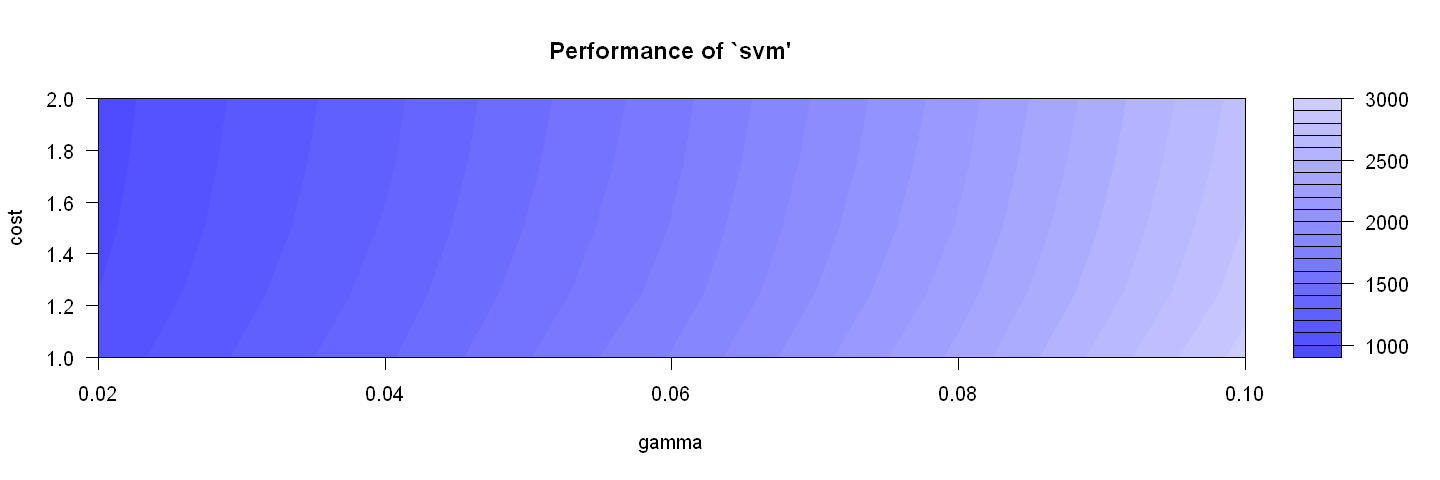

In [42]:
svm.dis.tune = tune.svm(Calories_Burned ~ ., data = datappr, cost = c(1,1.25,1.5,1.75,2), 
    gamma = seq(0.02, 0.1, by = 0.02))
plot(svm.dis.tune)

In [43]:
svm.dis.tune$best.parameters
svm.dis=svm(Calories_Burned~.,data=datappr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

,gamma,cost
,<dbl>,<dbl>
21,0.02,2


## Prévision de l'échantillon test


### Erreur de régression

In [44]:
pred.svmr=predict(svm.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
sum((pred.svmr-datestr[,"Calories_Burned"])^2)/nrow(datestr)

[1] 716.1125

Super puisqu'on voit que l'erreur a diminué: là on a plus que 27 kcal de diff (c'est pas énorme, ça correspond à une centaine de grammes de brocolis)

### Erreur de classification, matrices de confusion

In [48]:
categorie <- function(calories) {
  if(calories <= 300) {
    return("Faible")
  } else if(calories <= 600) {
    return("Moyenne")
  } else {
    return("Élevée")
  }
}

vraies_classes <- sapply(datestr$Calories_Burned, categorie)
pred_classes <- sapply(pred.svmr, categorie)

# 3. Créer la matrice de confusion
confusion <- table(Vrai = vraies_classes, Prévu = pred_classes)
print(confusion)

         Prévu
Vrai      Élevée Moyenne
  Élevée     168       1
  Moyenne      3      23
